 # **Properati**
Realizado en Google Colab


# ***Importación de librerías y carga del archivo***
---
---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from google.colab import drive
import re
import pylab

drive.mount("/content/gdrive", force_remount=True)
location = "/content/gdrive/My Drive/Desafío 1 DH - Equipo 3/Data/properatti.csv"
data = pd.read_csv(location)
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Unnamed: 0  ...                                    image_thumbnail
0           0  ...  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1           1  ...  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2           2  ...  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3           3  ...  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4           4  ...  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...

[5 rows x 26 columns]

# ***Análisis***
#### Se evaluarán distintos aspectos del dataset a trabajar, asi como composición, filas, tipos de datos, cantidad de filas y columnas, entre otros. 
---
---


In [2]:
data.describe()

Unnamed: 0   geonames_id  ...         rooms      expenses
count  121220.000000  1.025030e+05  ...  47390.000000  1.426200e+04
mean    60609.500000  3.574442e+06  ...      3.080840  5.009234e+03
std     34993.344153  3.541306e+05  ...      1.860773  1.204403e+05
min         0.000000  3.427208e+06  ...      1.000000  1.000000e+00
25%     30304.750000  3.430234e+06  ...      2.000000  1.000000e+03
50%     60609.500000  3.433910e+06  ...      3.000000  2.000000e+03
75%     90914.250000  3.836668e+06  ...      4.000000  4.000000e+03
max    121219.000000  6.948895e+06  ...     32.000000  1.000150e+07

[8 rows x 14 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [4]:
data.shape

(121220, 26)

In [5]:
data[data.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, operation, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail]
Index: []

## *Porcentaje de nulos*

In [6]:
data.isnull().sum() / data.shape[0] * 100

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


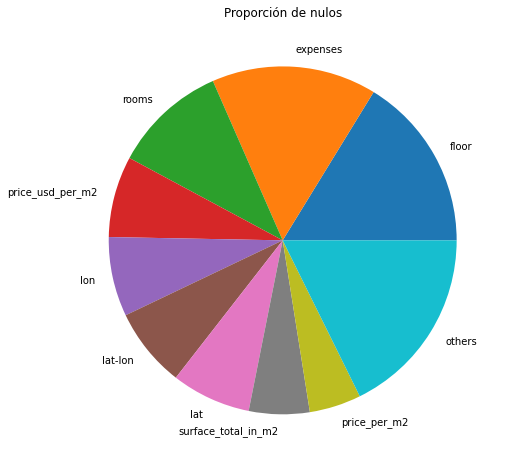

In [7]:
df_null=data.isnull().sum().sort_values(ascending=False)
df_null=df_null.reset_index()
df_null.columns=['field','nulls']

#top 9
df2_null=df_null.iloc[:9]

#others 
new_row = pd.DataFrame(data = {
    'field' : ['others'],
    'nulls' : [df_null['nulls'][9:].sum()]
})

#combining dfs
df_null_final = pd.concat([df2_null, new_row])

df_null_final.plot(kind = 'pie', y = 'nulls', figsize = (8,8), labels = df_null_final['field'],legend =False, title='Proporción de nulos')
pylab.axes().set_ylabel('')
plt.show()



## *Campos*


Operation

Tipo de operación con respecto al inmueble. Tiene todos los valores completos con valor 'sell'

In [8]:
data['operation'].value_counts()

sell    121220
Name: operation, dtype: int64

Property_type

Categorización del tipo de propiedad.

In [9]:
data['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

Place_name

Ubicación de la propiedad. Algunos tienen más nivel de detalle que otros.

In [10]:
data['place_name'].value_counts()

Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Trenel                   1
Costa Uruguay Sur        1
Reta                     1
Pampa del Infierno       1
Barrio Melazzi           1
Name: place_name, Length: 1060, dtype: int64

In [11]:
data['place_name'].sample(10)

22120        Mar del Plata
51637            Caballito
28184              Rosario
49320      Villa Ballester
115789             Córdoba
112412        San Fernando
36788     Parque Patricios
90503              Córdoba
102396             Córdoba
59865                Luján
Name: place_name, dtype: object

Vemos los nulos de place name.

In [12]:
data['place_name'].isnull().sum()

23

Nos damos cuenta que todos los nulos de place_name son de Tigre.

In [13]:
place_name_null_mask = data['place_name'].isnull()
data.loc[place_name_null_mask, 'place_with_parent_names'].value_counts()

|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    23
Name: place_with_parent_names, dtype: int64

Place_with_parent_names

Representación jerarquica de la ubicación, comenzando por el grado de granuralidad más alto y llegando al nivel de detalle más bajo. Pueden llegar  tener hasta 4 niveles

In [14]:
data['place_with_parent_names'].value_counts()

|Argentina|Santa Fe|Rosario|                                                   8504
|Argentina|Córdoba|Córdoba|                                                    6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                         6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                            3315
|Argentina|Capital Federal|Belgrano|                                           2992
                                                                               ... 
|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|Barrio Cerrado "Las Marías"|       1
|Argentina|Chubut|Los Cipreses|                                                   1
|Argentina|Jujuy|San Antonio|                                                     1
|Argentina|Bs.As. G.B.A. Zona Sur|Ezeiza|Barrio Melazzi|                          1
|Argentina|Buenos Aires Costa Atlántica|Mar de Cobo|                              1
Name: place_with_parent_names, Length: 1164, dtype: int64

Vemos que place_name es el último valor que registra la columna place_with_parent_names


Vamos a buscar algunos samples de esa columna para ver como estan redactados:
Nos damos cuenta que hay 4 campos: país, provincia, ciudad y en algunos casos localidad.

In [15]:
data.place_with_parent_names.sample(10)

60521     |Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...
44840       |Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza|
118126    |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...
12273     |Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...
15683     |Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...
81666     |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...
17487     |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
104702                         |Argentina|Santa Fe|Rosario|
1189           |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|
57491             |Argentina|Capital Federal|San Cristobal|
Name: place_with_parent_names, dtype: object

Vamos a agrupar por place_with_parent_names distintos por state_name

In [16]:
data.groupby('state_name').place_with_parent_names.nunique()

state_name
Bs.As. G.B.A. Zona Norte        275
Bs.As. G.B.A. Zona Oeste         85
Bs.As. G.B.A. Zona Sur          135
Buenos Aires Costa Atlántica     88
Buenos Aires Interior           124
Capital Federal                  62
Catamarca                         6
Chaco                             7
Chubut                           16
Corrientes                        7
Córdoba                         114
Entre Ríos                       25
Formosa                           1
Jujuy                             3
La Pampa                          9
La Rioja                          3
Mendoza                          30
Misiones                         18
Neuquén                          11
Río Negro                        13
Salta                            10
San Juan                          9
San Luis                         15
Santa Cruz                        6
Santa Fe                         77
Santiago Del Estero               2
Tierra Del Fuego                  3
Tucumán          

Country_name

País. Lógicamente todos son de Argentina.

In [17]:
data['country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

State_name

Provincia. Buenos Aires es la excepción a la regla ya que no está como una sola provincia, sino que tiene distintas zonas.                  

In [18]:
data['state_name'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

Geonames_id

Id identificador de cada provincia.

Analizamos si geonames_id está relacionado con state_name. Probamos con una provincia como Santa Fe.

In [19]:
data.geonames_id[data['state_name'] == 'Santa Fe'].unique()

array([3838574., 3837090., 3836277., 3429594., 3856226., 3836276.,
       3835793., 3856022., 3839479., 6942842., 3854895., 3855302.,
       3862325., 3838638., 3855105., 3860217., 3853958.,      nan,
       3865448., 3855244., 3853938., 3853509., 3837456., 3837821.,
       3853705., 3832778., 3856210., 3843919., 3843788., 3839262.,
       3865991., 3835910., 3837232., 3843135., 3844848., 3837122.,
       3837857., 3428973., 3839061., 3865281., 3862738., 3841500.,
       3436230., 3835617., 3842653., 3834971., 3835354., 3835711.,
       3855370., 3847836., 3865385., 3860886., 3840255., 3833062.,
       3865981., 3855626., 3840293., 3865485., 3854360., 3862215.,
       3838506., 3835998., 3860205., 3861631., 3855570., 3837441.,
       3847933., 3834897., 3855377., 3850920., 3430940.])

In [20]:
data.groupby('state_name').geonames_id.nunique()

state_name
Bs.As. G.B.A. Zona Norte         44
Bs.As. G.B.A. Zona Oeste         35
Bs.As. G.B.A. Zona Sur           58
Buenos Aires Costa Atlántica     34
Buenos Aires Interior            82
Capital Federal                  52
Catamarca                         4
Chaco                             7
Chubut                           13
Corrientes                        7
Córdoba                         100
Entre Ríos                       21
Formosa                           1
Jujuy                             2
La Pampa                          9
La Rioja                          3
Mendoza                          25
Misiones                         17
Neuquén                          10
Río Negro                        10
Salta                            10
San Juan                          8
San Luis                         12
Santa Cruz                        6
Santa Fe                         70
Santiago Del Estero               2
Tierra Del Fuego                  3
Tucumán          

In [21]:
data.groupby('geonames_id').state_name.nunique()

geonames_id
3427208.0    1
3427212.0    1
3427326.0    1
3427354.0    1
3427366.0    1
            ..
6693230.0    1
6942538.0    1
6942539.0    1
6942842.0    1
6948895.0    1
Name: state_name, Length: 646, dtype: int64

Como conclusión un geoname_id corresponde a una sola provincia (state_name) pero un state_name puede tener más de un geoname_id.

lat-lon, lat, lon

Latitud y longitud correspondiente a la ubicación. Vemos que hay algunos puntos que se alejan muchos de la tendencia.

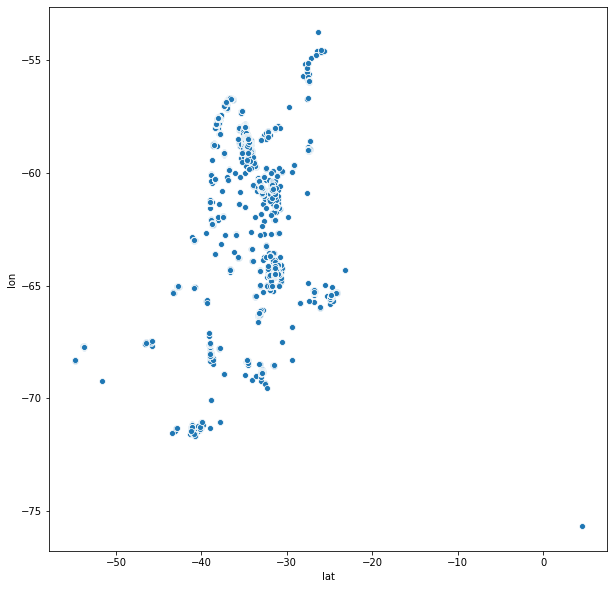

In [22]:
plt.figure(figsize = (10,10))
sns.scatterplot('lat', 'lon', data=data)

Price, currency

Precio y moneda. Hay algunos datos que no corresponden ni a dólar ni a peso argentino.

La mayoría esta en dolares sin embargo.

In [23]:
data.price.describe()

count    1.008100e+05
mean     4.685259e+05
std      2.260101e+06
min      0.000000e+00
25%      1.100000e+05
50%      1.850000e+05
75%      4.200000e+05
max      6.500000e+08
Name: price, dtype: float64

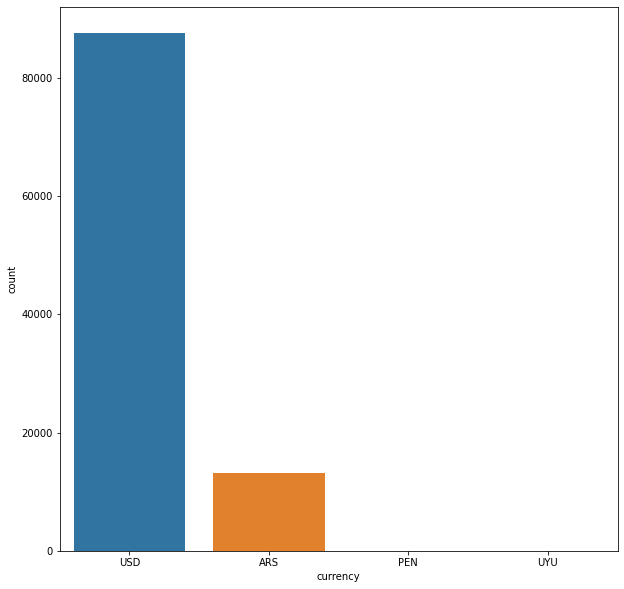

In [24]:
plt.figure(figsize = (10,10))
sns.countplot('currency', data=data)

In [25]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Vemos que no tiene sentido comparar los datos de esta manera, ya que tienen diferente currency, y por ende la distribución no nos brinda información fiable en su estado crudo. 

Evaluamos la distribución de los valores para la moneda en ARS:

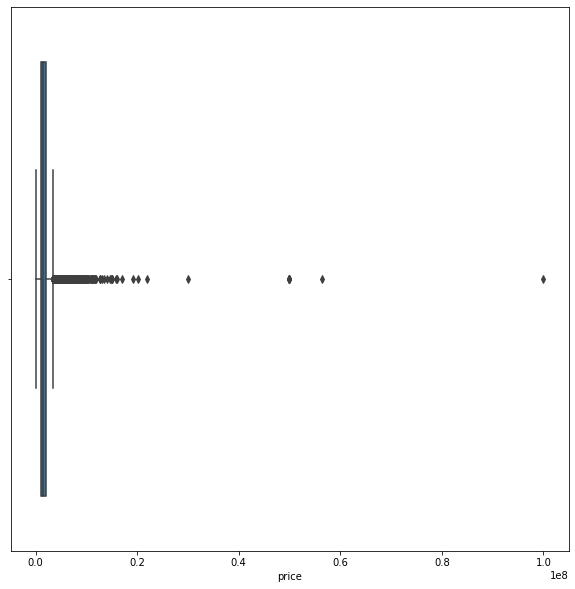

In [26]:
plt.figure(figsize = (10,10))
data_arg=data.loc[data.currency=='ARS',:]
sns.boxplot('price',data=data_arg)

Rooms

Habitaciones. Algunas son extremadamente grandes parece...

Encontramos que hay habitaciones con más de 10 cuartos, que probablemente sean outliers para nuestro futuro análisis. 

In [27]:
data['rooms'].value_counts()

3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
16.0       11
20.0       11
22.0        8
18.0        6
21.0        5
30.0        4
25.0        4
19.0        4
32.0        3
23.0        2
24.0        1
27.0        1
29.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64

Vemos cómo se distribuyen los valores en un gráfico de boxplot:

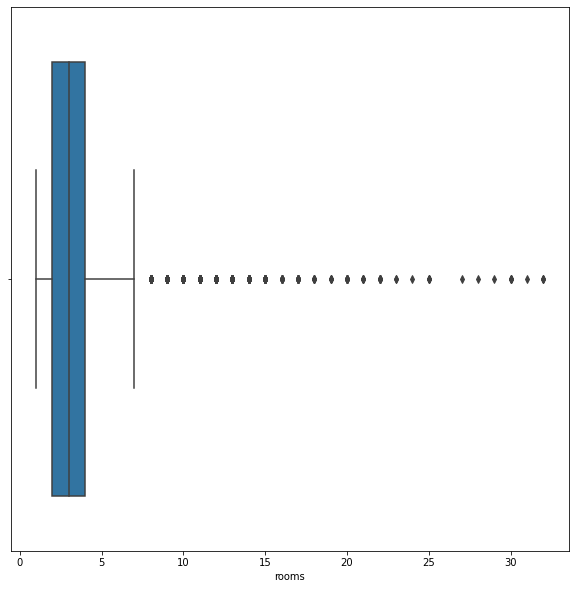

In [28]:
plt.figure(figsize = (10,10))
sns.boxplot('rooms', data=data)

# ***Relaciones entre campos***
---
---


Analizamos la correlación entre todas las variables numéricamente existentes.

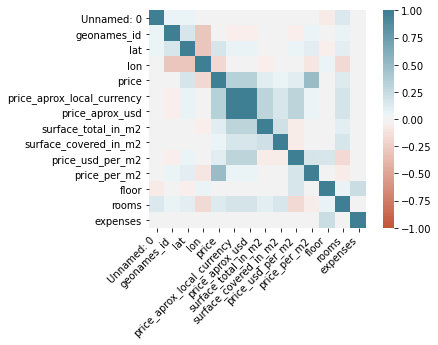

In [29]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Como conclusión vemos que hay correlación entre: 

*   price_aprox_usd y price_aprox_local_currency **mayormente**
*   rooms y price_usd_per_m2
*   price_usd_per_m2 y price_aprox_local_currency
*   price_usd_per_m2 y price_aprox_usd
*   lon y lat
*   price y price_aprox_local_currency
*   price y price_aprox_usd
*   price_per_m2 y price





Analizamos la relación de precio con distintas caracteristicas de la publicación.

Primero, vemos que las propiedades aumentan su valor hasta 5/6 habitaciones, y luego comienzan a decrecer. Probablemente es porque el valor marginal de una habitación en una casa de 15 habitaciones es menor que en una casa de 3 habitaciones. 

Además se puden apreciar outliers ya que tenemos propiedades con pocas habitaciones y valor del m2 en dólares alrededor de los 200000.

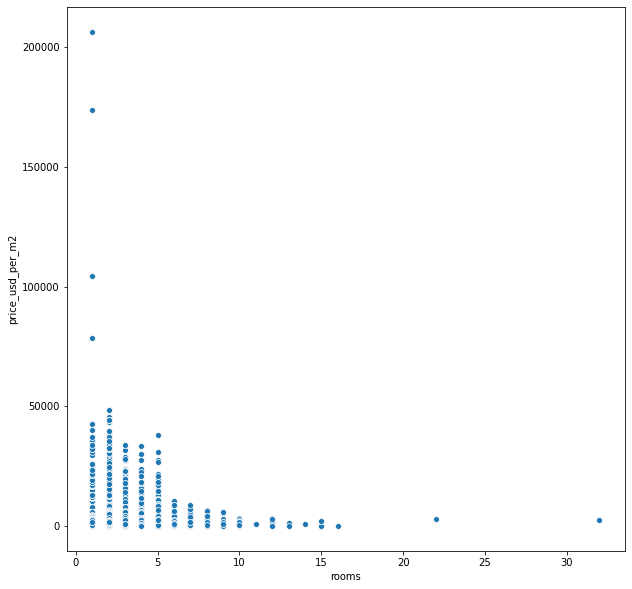

In [30]:
plt.figure(figsize = (10,10))
sns.scatterplot('rooms', 'price_usd_per_m2', data = data) 

También podemos ver en la siguiente distribución donde vemos numerosos outliers que llaman la atención para luego realizar una limpieza.

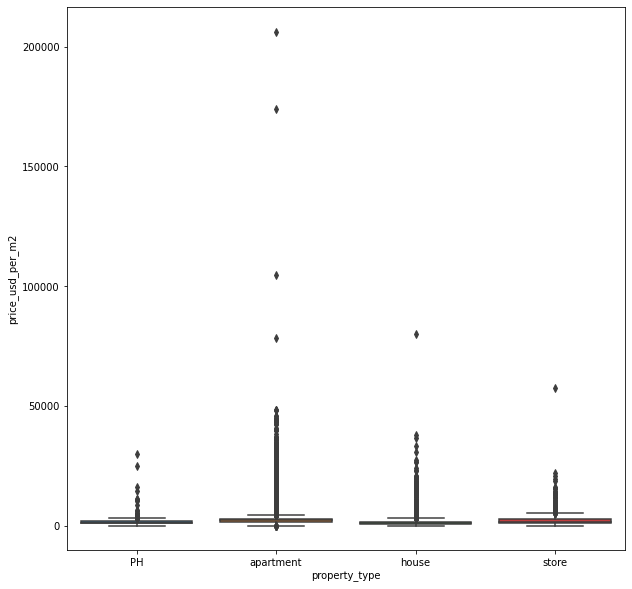

In [31]:
plt.figure(figsize = (10,10))
sns.boxplot('property_type', 'price_usd_per_m2', data = data)

Analizamos también el tipo de propiedad con respecto a la superficie, vemos que los departamentos y PH son los que concentran menores distribuciones de superficie.

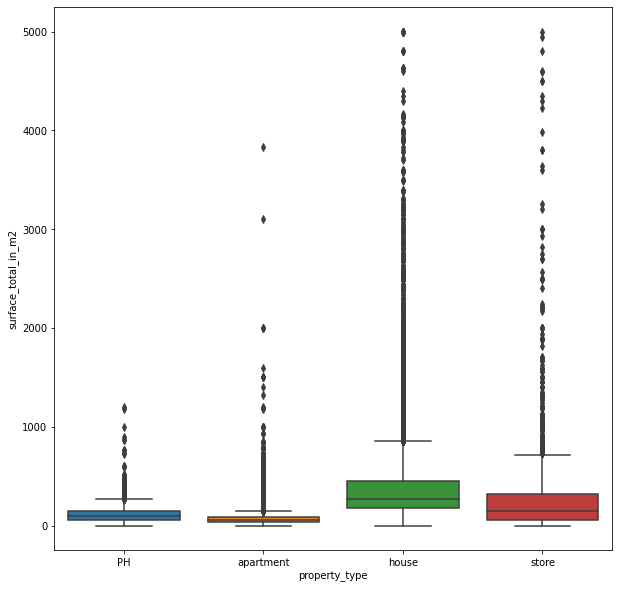

In [32]:
plt.figure(figsize = (10,10))
mascara_surf = (data['surface_total_in_m2'] <= 5000) & (data['price'] <= 4000000)
sns.boxplot('property_type', 'surface_total_in_m2', data = data[(mascara_surf)])

En una primera instancia, analizandolo globalmente, no encontramos ninguna correlación entre el precio y la superficie total en metros cuadrados. Vemos numerosos outliers en la visualización.


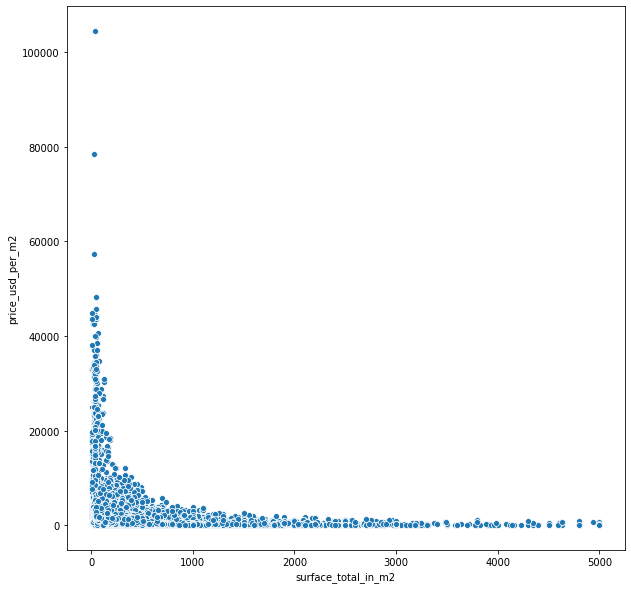

In [33]:
plt.figure(figsize = (10,10))
sns.scatterplot('surface_total_in_m2', 'price_usd_per_m2', data = data[(mascara_surf)])

Analizamos además cómo se relacionan lat y lon donde vemos un posible outlier por debajo a la derecha.

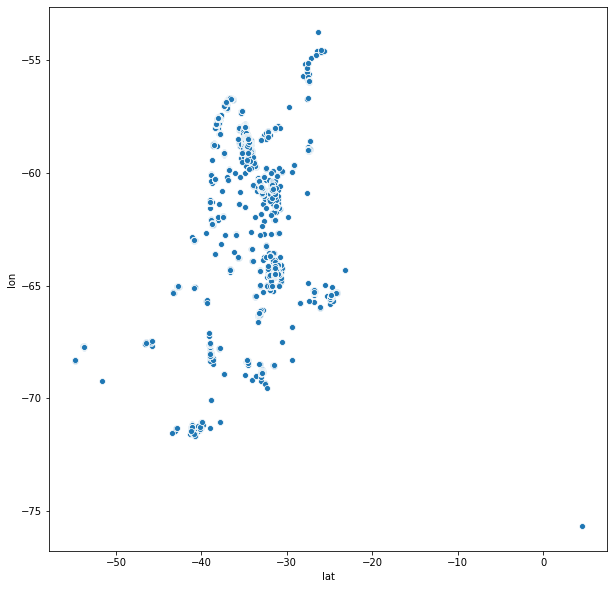

In [34]:
plt.figure(figsize = (10,10))
sns.scatterplot('lat', 'lon', data = data)

Vemos cómo se relacionan la cantidad de ambientes con respecto a la superficie, podemos apreciar que hay casos donde hay más de 10 habitaciones pero la superficie es menor, habría que ver si esos casos no corresponden a datos inconsistentes.

<Figure size 720x720 with 0 Axes>

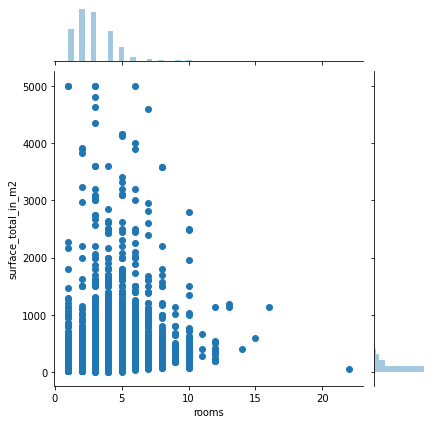

In [35]:
plt.figure(figsize = (10,10))
sns.jointplot('rooms', 'surface_total_in_m2', data = data[(mascara_surf)])

Finalmente, nos interesa analizar el área de Buenos Aires y Capital Federal.

Vemos qué tipo de propiedad posee cada zona.

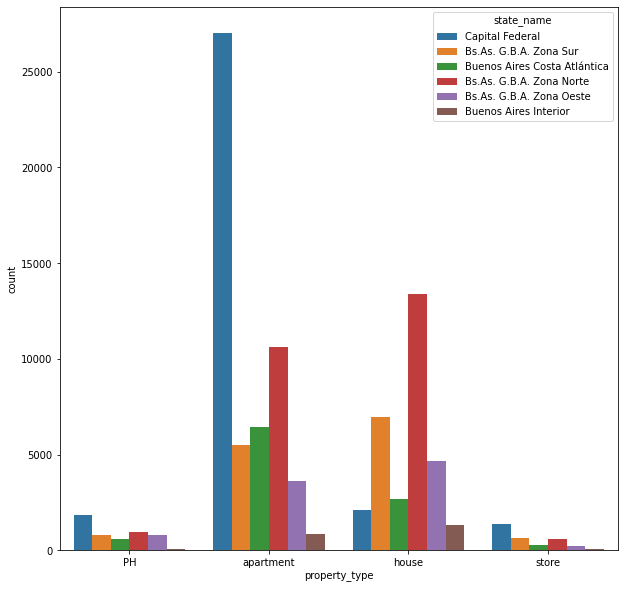

In [36]:
list_state_name=['Capital Federal','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Oeste','Buenos Aires Interior']
data_bsas_caba=data[data.state_name.isin(list_state_name)]
plt.figure(figsize = (10,10))
sns.countplot('property_type', data=data_bsas_caba, hue='state_name')

Vemos que hay más casos de departamento para lo que es Capital Federal mientras que para Bs As Costa Atlántica hay más departamentos pero considerablemente menor cantidad que CABA y para Bs As Zona Oeste, Sur y Norte hay más casos de casas.

Vemos la relación entre superficie y precio para estas zonas para ver si hayamos relaciones ya que anteriormente no la habíamos encontrado:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


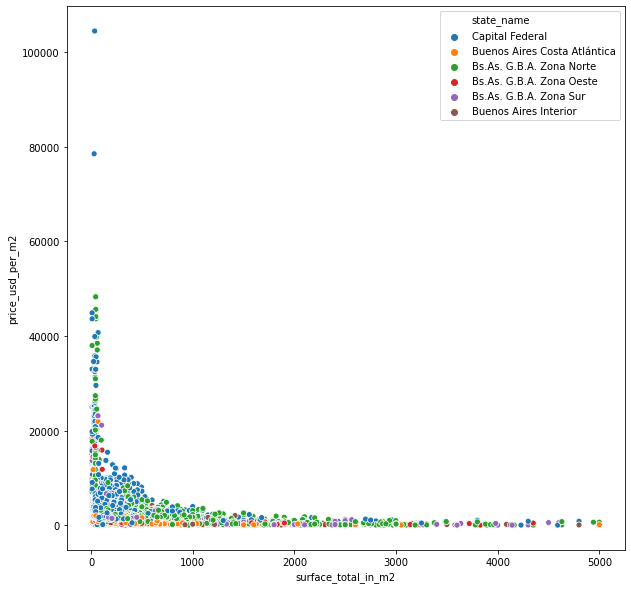

In [37]:
plt.figure(figsize = (10,10))
sns.scatterplot('surface_total_in_m2', 'price_usd_per_m2', data = data_bsas_caba[(mascara_surf)],hue='state_name')

Seguimos sin ver una correlación pero sí podemos notar que para la Costa Atlántica los precios son más bajos en comparación con Bs As Zona Norte y CABA.

Por último, queremos ver cómo se distribuyen los precios para estas zonas:

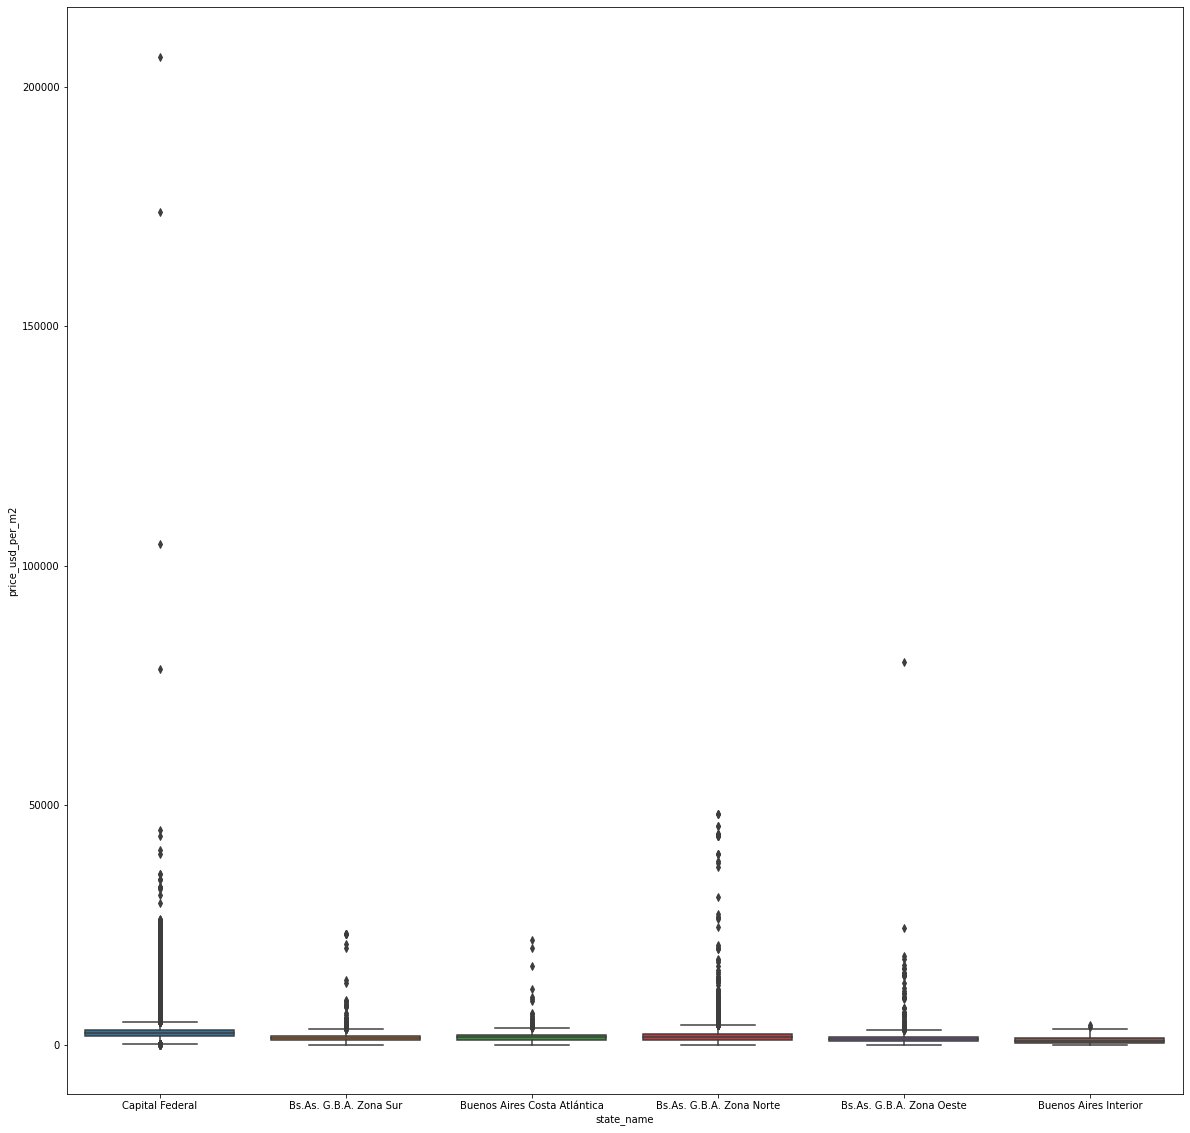

In [38]:
plt.figure(figsize = (20,20))
sns.boxplot('state_name', 'price_usd_per_m2', data = data_bsas_caba)

Vemos cuatro outliers bien marcados para Capital Federal.

# ***Limpieza de Datos***
---
---

## *Campos eliminados*
Decidimos dropear Unnamed: 0, properati_url e image_thumbnail ya que no aportan al análisis de los datos.

Floor y expenses poseen un porcentaje de nulos muy alto (93% y 88% respectivamente) por ende también se proceden a eliminar así como también el campo lat-lon ya que ya poseemos la latitud y longitud por separado.

In [39]:
data = data.drop(columns=['Unnamed: 0','floor', 'expenses', 'properati_url', 'image_thumbnail','lat-lon'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat                         69670 non-null   float64
 8   lon                         69670 non-null   float64
 9   price                       100810 non-null  float64
 10  currency                    100809 non-null  object 
 11  price_aprox_local_currency  100810 non-null  float64
 12  price_aprox_usd             100810 non-null  float64
 13  surface_total_

In [40]:
nulls_inicio=data.isnull().sum()

Volvemos a ver si hay duplicados

In [41]:
data[data.duplicated()]

operation  ...                                              title
221         sell  ...                                   Ultimas Unidades
245         sell  ...  Departamentos monoambiente, zona parque Indepe...
247         sell  ...  Departamentos monoambiente, zona parque Indepe...
248         sell  ...  Departamentos monoambiente, zona parque Indepe...
249         sell  ...  Departamentos monoambiente, zona parque Indepe...
...          ...  ...                                                ...
121201      sell  ...                       Departamento - Nueva Cordoba
121204      sell  ...                       Departamento - Nueva Cordoba
121206      sell  ...                       Departamento - Nueva Cordoba
121208      sell  ...              Casa  en venta Puertos, barrio Vistas
121209      sell  ...  Av .Luis Maria Campos 1400- Belgrano-Capital F...

[5251 rows x 20 columns]

## *Campo description*
Aunque no creemos que un modelo sea relevante este campo, para él desafío decidimos completar los valores faltantes por el título ya que título poseen todos los registros.

In [42]:
data.loc[data.description.isnull(),'description']=data.loc[data.description.isnull(),'title']

In [43]:
data.iloc[10664].description

'HERMOSO DEPARTAMENTO CON PISCINA Y COCHERA '

## *Comuna*
En base a los datos del Gobierno de la Ciudad de Buenos Aires se relacionan las comunas con place_name de Capital Federal.

In [44]:
comunas=pd.read_csv("/content/gdrive/My Drive/Desafío 1 DH - Equipo 3/Data/barrios_comunas.csv")
comunas.head()

BARRIO  COMUNA
0  AGRONOMIA      15
1    ALMAGRO       5
2  BALVANERA       3
3   BARRACAS       4
4   BELGRANO      13

In [45]:
row_default={'BARRIO':'OTROS','COMUNA':0}
comunas = comunas.append(row_default, ignore_index=True)

In [46]:
comunas.BARRIO.unique()

array(['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO',
       'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES',
       'CONSTITUCION', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS',
       'MONSERRAT', 'MONTE CASTRO', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO',
       'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS',
       'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA',
       'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO',
       'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE',
       'VILLA DEVOTO', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO',
       'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL',
       'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI',
       'VILLA URQUIZA', 'OTROS'], dtype=object)

In [47]:
data.loc[data.state_name == 'Capital Federal','place_name_caba_mayus']=data[data.state_name == 'Capital Federal'].place_name.str.upper()
data.place_name_caba_mayus.unique()

array(['MATADEROS', nan, 'LINIERS', 'BELGRANO', 'PALERMO SOHO', 'PALERMO',
       'FLORES', 'BOEDO', 'LAS CAÑITAS', 'PUERTO MADERO', 'BALVANERA',
       'CABALLITO', 'NUÑEZ', 'SAN TELMO', 'ALMAGRO', 'CAPITAL FEDERAL',
       'COLEGIALES', 'FLORESTA', 'BARRIO NORTE', 'BARRACAS', 'RECOLETA',
       'CONGRESO', 'VILLA CRESPO', 'CHACARITA', 'CONSTITUCIÓN',
       'VILLA URQUIZA', 'PALERMO HOLLYWOOD', 'SAAVEDRA', 'MONSERRAT',
       'POMPEYA', 'PARQUE CHAS', 'PATERNAL', 'AGRONOMÍA',
       'VILLA PUEYRREDÓN', 'COGHLAN', 'PARQUE CENTENARIO',
       'PALERMO CHICO', 'VILLA LURO', 'VILLA DEVOTO', 'BOCA',
       'PARQUE AVELLANEDA', 'SAN CRISTOBAL', 'VELEZ SARSFIELD', 'ABASTO',
       'VERSALLES', 'VILLA DEL PARQUE', 'MONTE CASTRO', 'RETIRO',
       'PARQUE PATRICIOS', 'SAN NICOLÁS', 'VILLA SANTA RITA',
       'CENTRO / MICROCENTRO', 'ONCE', 'TRIBUNALES', 'PARQUE CHACABUCO',
       'CATALINAS', 'VILLA GENERAL MITRE', 'PALERMO VIEJO',
       'VILLA LUGANO', 'VILLA ORTUZAR', 'VILLA SOLDATI', 'VIL

In [48]:
dicc_barrios={'PALERMO SOHO':'PALERMO', 'LAS CAÑITAS':'PALERMO', 'CAPITAL FEDERAL':'OTROS',
      'BARRIO NORTE':'RECOLETA', 'CONGRESO':'BALVANERA', 'PALERMO HOLLYWOOD':'PALERMO', 
      'POMPEYA':'NUEVA POMPEYA', 'PARQUE CENTENARIO':'ALMAGRO', 'PALERMO CHICO':'PALERMO',
      'ABASTO':'BALVANERA', 'CENTRO / MICROCENTRO':'MONSERRAT', 'ONCE':'BALVANERA',
      'TRIBUNALES':'SAN NICOLAS', 'CATALINAS':'BOCA', 'VILLA GENERAL MITRE':'VILLA GRAL. MITRE',
      'PALERMO VIEJO':'PALERMO', 'CONSTITUCIÓN':'CONSTITUCION', 
      'VILLA PUEYRREDÓN':'VILLA PUEYRREDON','SAN NICOLÁS':'SAN NICOLAS','AGRONOMÍA':'AGRONOMIA'}

Cabe destacar que para quitar las tildes del texto se podría haber usado un patrón con regex o bien vimos que se puede utilizar la librería unidecode pero por cuestiones de tiempos lo agregamos al diccionario.

In [49]:
data.place_name_caba_mayus.replace(dicc_barrios,inplace=True)

In [50]:
data.place_name_caba_mayus.unique()

array(['MATADEROS', nan, 'LINIERS', 'BELGRANO', 'PALERMO', 'FLORES',
       'BOEDO', 'PUERTO MADERO', 'BALVANERA', 'CABALLITO', 'NUÑEZ',
       'SAN TELMO', 'ALMAGRO', 'OTROS', 'COLEGIALES', 'FLORESTA',
       'RECOLETA', 'BARRACAS', 'VILLA CRESPO', 'CHACARITA',
       'CONSTITUCION', 'VILLA URQUIZA', 'SAAVEDRA', 'MONSERRAT',
       'NUEVA POMPEYA', 'PARQUE CHAS', 'PATERNAL', 'AGRONOMIA',
       'VILLA PUEYRREDON', 'COGHLAN', 'VILLA LURO', 'VILLA DEVOTO',
       'BOCA', 'PARQUE AVELLANEDA', 'SAN CRISTOBAL', 'VELEZ SARSFIELD',
       'VERSALLES', 'VILLA DEL PARQUE', 'MONTE CASTRO', 'RETIRO',
       'PARQUE PATRICIOS', 'SAN NICOLAS', 'VILLA SANTA RITA',
       'PARQUE CHACABUCO', 'VILLA GRAL. MITRE', 'VILLA LUGANO',
       'VILLA ORTUZAR', 'VILLA SOLDATI', 'VILLA REAL', 'VILLA RIACHUELO'],
      dtype=object)

Hacemos join entre ambos datasets.

In [51]:
comunas=comunas.rename({'BARRIO':'place_name_caba_mayus','COMUNA':'comuna'},axis='columns')
comunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   place_name_caba_mayus  49 non-null     object
 1   comuna                 49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 912.0+ bytes


In [52]:
data.shape

(121220, 21)

In [53]:
data[data.state_name=='Capital Federal'].place_name_caba_mayus.value_counts()

PALERMO              4226
BELGRANO             2992
RECOLETA             2687
CABALLITO            2273
VILLA URQUIZA        1629
FLORES               1354
VILLA CRESPO         1331
OTROS                1297
BALVANERA            1282
ALMAGRO              1233
SAN TELMO            1216
BOEDO                 890
NUÑEZ                 778
MONSERRAT             761
PUERTO MADERO         647
SAN CRISTOBAL         614
SAAVEDRA              542
FLORESTA              516
VILLA DEL PARQUE      488
VILLA LURO            432
BARRACAS              425
VILLA DEVOTO          420
MATADEROS             418
LINIERS               408
COLEGIALES            352
PARQUE PATRICIOS      322
SAN NICOLAS           285
COGHLAN               259
RETIRO                248
BOCA                  227
CHACARITA             227
CONSTITUCION          211
VILLA LUGANO          205
VILLA PUEYRREDON      175
PATERNAL              173
PARQUE CHACABUCO      146
VILLA ORTUZAR          86
MONTE CASTRO           79
NUEVA POMPEY

In [54]:
data=pd.merge(data,comunas,on='place_name_caba_mayus',how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat                         69670 non-null   float64
 8   lon                         69670 non-null   float64
 9   price                       100810 non-null  float64
 10  currency                    100809 non-null  object 
 11  price_aprox_local_currency  100810 non-null  float64
 12  price_aprox_usd             100810 non-null  float64
 13  surface_total_

In [55]:
data.shape

(121220, 22)

Vemos el resultado. Cabe destacar que en comuna 0 quedaron aquellos barrios que corresponden a 'OTROS' ya que no está claro su comuna, por ejemplo el barrio 'CAPITAL FEDERAL'.

In [56]:
data.groupby('comuna').state_name.count()

comuna
0.0     1297
1.0     3368
2.0     2687
3.0     1896
4.0     1038
5.0     2123
6.0     2273
7.0     1500
8.0      226
9.0      882
10.0    1158
11.0    1013
12.0    2605
13.0    4122
14.0    4226
15.0    1902
Name: state_name, dtype: int64

In [57]:
data=data.drop(columns=['place_name_caba_mayus'])

## *Place Name*

Anteriormente vimos que todos los valores nulos eran de Tigre, asi que vamos a reemplazarlos por Tigre. 

In [58]:
data.loc[place_name_null_mask, 'place_name'] = "Tigre" 
data.loc[place_name_null_mask, 'place_name']

6489     Tigre
10201    Tigre
11451    Tigre
14839    Tigre
18622    Tigre
21922    Tigre
23664    Tigre
24722    Tigre
38856    Tigre
45970    Tigre
46642    Tigre
53130    Tigre
55306    Tigre
57703    Tigre
57759    Tigre
57764    Tigre
57793    Tigre
58004    Tigre
58037    Tigre
59069    Tigre
62411    Tigre
62413    Tigre
63849    Tigre
Name: place_name, dtype: object

Chequeamos que no hayan quedado nulos:

In [59]:
data['place_name'].isnull().sum()

0

## *Place With Parents Name*

Usaremos el método str.split para separar place_with_parent_names en 4 según el delimitador "|".

Luego, vamos a trabajar con el nuevo DataFrame place_with_parent_names_divided.

In [60]:
place_with_parent_names_divided = data["place_with_parent_names"].str.split("|", n = 5, expand = True)
place_with_parent_names_divided.rename(columns={0:'Index', 1:'country' , 2: 'state', 3:'city' , 4:'neighborhood', 5:'resto' }, inplace=True)
del(place_with_parent_names_divided['resto'])
place_with_parent_names_divided

Index    country  ...           city neighborhood
0             Argentina  ...      Mataderos             
1             Argentina  ...       La Plata             
2             Argentina  ...      Mataderos             
3             Argentina  ...        Liniers             
4             Argentina  ...  Mar del Plata       Centro
...      ...        ...  ...            ...          ...
121215        Argentina  ...       Belgrano             
121216        Argentina  ...     San Isidro       Beccar
121217        Argentina  ...  Villa Urquiza             
121218        Argentina  ...  Mar del Plata  Plaza Colón
121219        Argentina  ...                        None

[121220 rows x 5 columns]

Inspeccionamos donde tenemos nulls, y nos damos cuenta que probablemente no era obligatoria la carga de datos en la 4° columna. 

In [61]:
place_with_parent_names_divided.isnull().sum()

Index              0
country            0
state              0
city               0
neighborhood    4780
dtype: int64

Sin embargo, notamos que además de los nulls, tenemos valores vacíos que no se toman como null. 

Por ejemplo en el registro 121218 en la columna "city".
Solo toma como nulls los valores expresados en None, pero no los vacíos.


In [62]:
place_with_parent_names_divided.iloc[121219, :]

Index                          
country               Argentina
state           Capital Federal
city                           
neighborhood               None
Name: 121219, dtype: object

Vamos a ver de que manera actúan los nulls. Notamos que la mayoría son de Córdoba y de CABA. Y que estos mismos tienen la columna "city" vacía. 

In [63]:
mask_null_pwp = place_with_parent_names_divided.iloc[:,4].isnull()
print(place_with_parent_names_divided.loc[mask_null_pwp, ('state', 'city', 'neighborhood')])
print(place_with_parent_names_divided.loc[mask_null_pwp, 'state'].value_counts())

                  state city neighborhood
108     Capital Federal              None
110     Capital Federal              None
115     Capital Federal              None
119     Capital Federal              None
121     Capital Federal              None
...                 ...  ...          ...
121203          Córdoba              None
121204          Córdoba              None
121205          Córdoba              None
121206          Córdoba              None
121219  Capital Federal              None

[4780 rows x 3 columns]
Córdoba                         2648
Capital Federal                 1297
Bs.As. G.B.A. Zona Norte         222
Mendoza                          130
Buenos Aires Interior            106
Tucumán                           77
Bs.As. G.B.A. Zona Oeste          65
Misiones                          44
Santa Fe                          33
Buenos Aires Costa Atlántica      27
San Luis                          24
Bs.As. G.B.A. Zona Sur            24
Salta                      

Concluímos que en la columna "city" hay 4780 vacíos, que son los mismos que vimos antes que derivan en nulls. 
Los 7600 de la columna "neighborhood" deben ser los que no se llenaron, quizás porque no era redundante esa información. 

In [64]:
vacios = []
for i in range(5):
  i_vacios_mask = place_with_parent_names_divided.iloc[:,i] == ""
  i_vacios = i_vacios_mask.sum()
  vacios.append(i_vacios)
vacios

[121220, 0, 0, 4780, 76023]

Vamos a intentar llenar una nueva columna, obteniendo los valores mas detallados posibles para cada registro. 
Con este dato, vamos a comparar versus la columna "place_name" y ver si hay alguna irregularidad. 

In [65]:
mask_vacios_neig = place_with_parent_names_divided.iloc[:,4] == ""
place_with_parent_names_divided.loc[mask_vacios_neig, ('state', 'city', 'neighborhood')]

state           city neighborhood
0                Capital Federal      Mataderos             
1         Bs.As. G.B.A. Zona Sur       La Plata             
2                Capital Federal      Mataderos             
3                Capital Federal        Liniers             
5                     Entre Ríos   Gualeguaychú             
...                          ...            ...          ...
121208  Bs.As. G.B.A. Zona Norte        Escobar             
121209           Capital Federal       Belgrano             
121214  Bs.As. G.B.A. Zona Norte     San Isidro             
121215           Capital Federal       Belgrano             
121217           Capital Federal  Villa Urquiza             

[76023 rows x 3 columns]

Comenzamos con los de la 4° columna vacía, que son 76023, y vamos a rellenarla con la tercer columna. 
Siguiendo el razonamiento anterior, vamos a copiar todos los valores de city en neighborhood de los que tienen esa columna vacía. 

Terminamos confirmando que no hay ningún dato vacío. Solo quedan los 4780n nulls.

In [66]:
place_with_parent_names_divided.loc[mask_vacios_neig,'neighborhood'] = place_with_parent_names_divided.loc[mask_vacios_neig,'city']
(place_with_parent_names_divided.iloc[:,4] == "").sum()

0

A aquellos que tienen vacíos su tercer nivel, los dejamos con su valor de state. 

In [67]:
place_with_parent_names_divided.loc[mask_null_pwp,'neighborhood'] = place_with_parent_names_divided.loc[mask_null_pwp,'state'] 
place_with_parent_names_divided.isnull().sum()

Index           0
country         0
state           0
city            0
neighborhood    0
dtype: int64

Procedemos a comparar nuestra nueva columna "neighborhood" con "place_name"

In [68]:
mask_comparacion = (place_with_parent_names_divided.neighborhood != data.place_name)
mask_comparacion.sum()

print(data.loc[mask_comparacion, ('state_name','place_name')], place_with_parent_names_divided.loc[mask_comparacion, ('city','neighborhood')])

                      state_name                 place_name
17      Bs.As. G.B.A. Zona Norte             Barrio El Golf
33      Bs.As. G.B.A. Zona Norte             Barrio El Golf
278     Bs.As. G.B.A. Zona Norte       Barrio Las Glorietas
416     Bs.As. G.B.A. Zona Norte           Barrio Los Lagos
446     Bs.As. G.B.A. Zona Norte       Barrio Las Glorietas
...                          ...                        ...
117011  Bs.As. G.B.A. Zona Norte                 QBay Yacht
118210  Bs.As. G.B.A. Zona Norte           Barrio Los Lagos
118841  Bs.As. G.B.A. Zona Norte  Barrio Barrancas del Lago
119583  Bs.As. G.B.A. Zona Norte  Barrio Barrancas del Lago
120156  Bs.As. G.B.A. Zona Norte  Barrio Barrancas del Lago

[548 rows x 2 columns]          city neighborhood
17      Tigre     Nordelta
33      Tigre     Nordelta
278     Tigre     Nordelta
416     Tigre     Nordelta
446     Tigre     Nordelta
...       ...          ...
117011  Tigre     Nordelta
118210  Tigre     Nordelta
118841  Tigre

In [69]:
place_with_parent_names_divided.loc[mask_comparacion,'neighborhood'].value_counts()

Nordelta    548
Name: neighborhood, dtype: int64

Nos damos cuenta que son todos barrios de Nordelta. 
Para nuestro análisis va a servir más dejar el "Nordelta", que cada uno de sus barrios desagregados. 

In [70]:
data.loc[mask_comparacion, 'place_name'].value_counts()

Barrio Los Alisos            278
Barrio La Alameda             62
BarrioPortezuelo              54
Barrio Los Lagos              39
Barrio El Golf                32
Enyoi                         17
Barrio Los Castores           14
QBay Yacht                    13
Barrio La Isla                10
Barrio Las Glorietas          10
Islas del Canal                6
Barrio Barrancas del Lago      4
Barrio Los Sauces              4
Barrio Cabos del Lago          3
Barrio Los Tilos               1
Barrio El Yacht                1
Name: place_name, dtype: int64

In [71]:
data.loc[mask_comparacion, 'place_name'] = "Nordelta"

In [72]:
data.loc[mask_comparacion, 'place_name'].value_counts()

Nordelta    548
Name: place_name, dtype: int64

Por último, vamos a crear una nueva columna llamada "Place_name_2" con un nivel menor de detalle, por si el detalle confunde al posterior análisis.
Por ejemplo, creemos que el dato "Centro" visto desde una perspectiva amplia no sirve. 

In [73]:
mask_vacios_city = place_with_parent_names_divided.iloc[:,3] == ""
print(mask_vacios_city.sum())
place_with_parent_names_divided.loc[mask_vacios_city, 'city'] = place_with_parent_names_divided.loc[mask_vacios_city,'state']
mask_vacios_city.sum()


4780


4780

In [74]:
place_name_2 = place_with_parent_names_divided.loc[:, 'city']
place_name_2.size

121220

Unimos la nueva columna al dataset. Ya en el head vemos que brinda una informacióón distinta que al analizar el país holístiamente, va a ser más valiosa. 

In [75]:
data['place_name_2'] = place_name_2
data.loc[:, ('place_name', 'place_name_2')].head(20)

place_name   place_name_2
0      Mataderos      Mataderos
1       La Plata       La Plata
2      Mataderos      Mataderos
3        Liniers        Liniers
4         Centro  Mar del Plata
5   Gualeguaychú   Gualeguaychú
6          Munro  Vicente López
7       Belgrano       Belgrano
8       Belgrano       Belgrano
9        Rosario        Rosario
10       Córdoba        Córdoba
11    San Miguel     San Miguel
12      Martínez     San Isidro
13  Palermo Soho        Palermo
14  Palermo Soho        Palermo
15   Bella Vista     San Miguel
16     Mataderos      Mataderos
17      Nordelta          Tigre
18         Tigre          Tigre
19       Palermo        Palermo

## *Superficie por M2*
Trabajamos con superficie cubierta y superficie total 


Comenzamos analizando los datos crudos, para tener presente los problemas que nos vamos a encontrar. 

In [76]:
superficie_total = data['surface_total_in_m2']
superficie_total.dtype

dtype('float64')

In [77]:
print(superficie_total.shape)
print(superficie_total.isnull().sum())

(121220,)
39328


Vemos que tenemos un pequeño porcentaje de nulos antes de realizar alguna limpieza en el campo superficie_total

In [78]:
nulos_suptotal = superficie_total.isnull().sum()/superficie_total.sum()*100
nulos_suptotal

0.20541140596345955

Procedemos a investigar el campo "surface_covered_in_m2". Lo vamos a usar para completar la superficie total. vemos que hay valores outliers que luego tendremos que limpiar. También tiene un pequeño porcentaje de nulos. 

In [79]:
superficie_cubierta = data['surface_covered_in_m2'] 
superficie_cubierta.value_counts()

40.0      2736
50.0      2184
45.0      2142
60.0      1888
100.0     1848
          ... 
944.0        1
1589.0       1
628.0        1
849.0        1
2300.0       1
Name: surface_covered_in_m2, Length: 995, dtype: int64

In [80]:
nulos_cubierta = superficie_cubierta.isnull().sum()/ superficie_total.sum()*100
nulos_cubierta

0.10397489977915454

Comparamos los valores entre ambas columnas y los analizamos en conjunto ya que enetre ellas vamos a armar una columna final con el dato de superficie_total lo mas limpia posible. 

In [81]:
data_superficie = data.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2']]
data_superficie.head()

surface_total_in_m2  surface_covered_in_m2
0                 55.0                   40.0
1                  NaN                    NaN
2                 55.0                   55.0
3                  NaN                    NaN
4                 35.0                   35.0

In [82]:
nulos_totales = data_superficie.isnull().sum()
nulos_totales

surface_total_in_m2      39328
surface_covered_in_m2    19907
dtype: int64

In [83]:
porcentaje_nulos_totales = nulos_totales / data_superficie.sum() * 100 #uso superficie porque es lo mismo cualquiera de los dos. Solo quiero el total
porcentaje_nulos_totales

surface_total_in_m2      0.205411
surface_covered_in_m2    0.147681
dtype: float64

Vamos a analizar graficamente ambos datos.

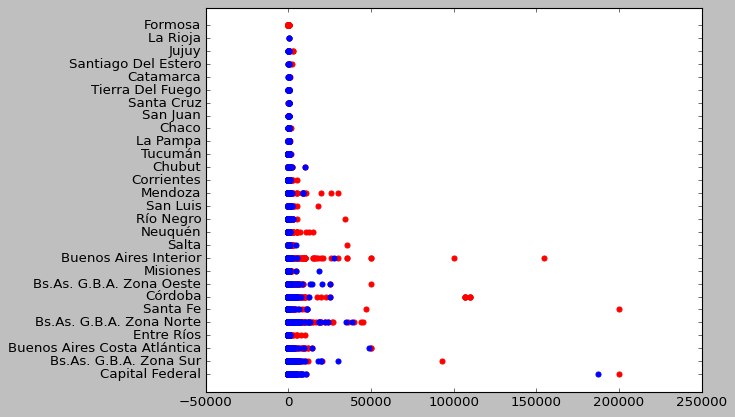

In [84]:
plt.style.use('classic')
fig = plt.figure()
ax = plt.axes()
ax.scatter(data.surface_total_in_m2, data.state_name, color='red');
ax.scatter(data.surface_covered_in_m2, data.state_name,color='blue')

Notamos que el gráfico es un lío, porque los datos estan muy desordenados y con varios outliers que debemos limpiar

Asumimos que al ser mas los que tienen el dato de superficie cubierta que el de superficie total, rellenar los segundos con los primeros tiene sentido. Es decir, pensando que si tengo un depto sin nada de superficie no cubierta, el procedimiento sería adecuado. 
No relleno la superficie total, porque ya rellene la cubierta.

In [85]:
mask_null_superficie_total = data['surface_total_in_m2'].isnull()
print(mask_null_superficie_total)
print(mask_null_superficie_total.sum())

data.loc[mask_null_superficie_total, 'surface_total_in_m2'] = data.loc[mask_null_superficie_total, 'surface_covered_in_m2']
data.loc[mask_null_superficie_total, ['surface_total_in_m2', 'surface_covered_in_m2']]

0         False
1          True
2         False
3          True
4         False
          ...  
121215    False
121216    False
121217    False
121218    False
121219    False
Name: surface_total_in_m2, Length: 121220, dtype: bool
39328


surface_total_in_m2  surface_covered_in_m2
1                       NaN                    NaN
3                       NaN                    NaN
9                       NaN                    NaN
11                      NaN                    NaN
65                      NaN                    NaN
...                     ...                    ...
121155                130.0                  130.0
121156                130.0                  130.0
121207                178.0                  178.0
121208                178.0                  178.0
121210                120.0                  120.0

[39328 rows x 2 columns]

In [86]:
print(data.surface_total_in_m2.isnull().sum())
print(data.surface_covered_in_m2.isnull().sum())

12369
19907


Volvemos a mirar la distribución gráficamente para ver si mejoró. Ahora concentrandonos tan solo en superficie total. 

No handles with labels found to put in legend.


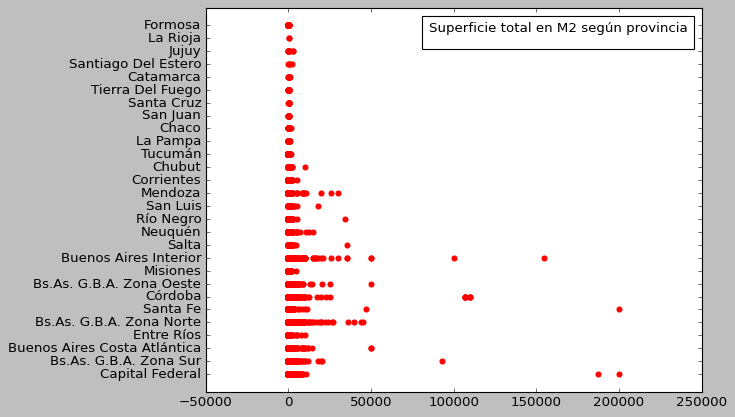

In [87]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(data.surface_total_in_m2, data.state_name, color='red');
ax.legend(loc='upper right', title = 'Superficie total en M2 según provincia')

Aun ahora, con menos datos faltantes, seguimos viendo que los outliers son un problema y debemos seguir limpiando.
Armamos un boxplot para enteder mejor desde donde arrancan estos outliers. 

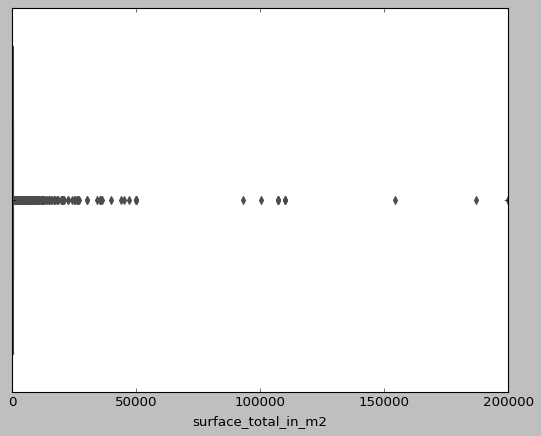

In [88]:
sns.boxplot(data.surface_total_in_m2)

Buscamos obtener ciertas medidas estadisticas descriptivas de la data para entender la distribución y los oultiers. 

Vemos un par de outliers con cero y un par con valores altisimos. Con 200 mil m2. Podrían ser campos porque no es superficie cubierta la mayoría, pero me parecería ideal sacarlos, para estimar un mejor modelo. En especial siendo tan pocos. 

In [89]:
print('Máximo superficie total:', data.surface_total_in_m2.max())
print('Mínimo superficie total:', data.surface_total_in_m2.min())
print('Media superficie total:', data.surface_total_in_m2.mean())
print('Desvío estandar superficie total:', data.surface_total_in_m2.std())

Máximo superficie total: 200000.0
Mínimo superficie total: 0.0
Media superficie total: 211.39387786974856
Desvío estandar superficie total: 1656.437195048001


También encontramos valores con superficie igual a cero. Estos vamos a buscar borrarlos, ya que son muy pocos y no nos sirven. 

In [90]:
superficie_mayor_a_cero = data.surface_total_in_m2 > 0
print(superficie_mayor_a_cero.sum())
superficie_cero = data.surface_total_in_m2 == 0
print(superficie_cero.sum())

108468
383


Limpiamos el 0,01% de los datos menores, para deshacernos de los que tienen 0m2 de superficie. 
También limpiamos el 10% de los valores más altos, para deshacernos de esa importante cantidad de ouliers que vimos en el boxplot.

In [91]:
umbral_inferior = data.surface_total_in_m2.quantile(0.01)
umbral_superior = data.surface_total_in_m2.quantile(0.90)

print(umbral_superior)
print(umbral_inferior)

outlier_mask_up = data.surface_total_in_m2 > umbral_superior
outlier_mask_down = data.surface_total_in_m2 < umbral_inferior
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

superficie_total = data.surface_total_in_m2

superficie_limpia = superficie_total[not_outliers]
superficie_limpia.describe()

369.0
20.0


count    97099.000000
mean       106.711099
std         80.508698
min         20.000000
25%         48.000000
50%         75.000000
75%        143.000000
max        369.000000
Name: surface_total_in_m2, dtype: float64

Armamos un nuevo boxplot. Vemos que la disrtribución nos quedo dentro de valores razonables, y sin outliers reales. 

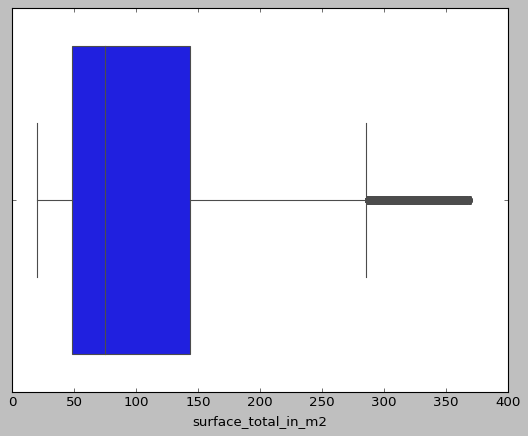

In [92]:
sns.boxplot(superficie_limpia)


Vemos que generamos una distribución mucho mas limpia, asi que vamos a crear una nueva columna con estos datos mas claros.



In [93]:
data['surface_total_in_m2_clean'] = superficie_limpia

In [94]:
print(superficie_limpia.min())
checksuperficie = superficie_limpia == 0
print(checksuperficie.sum())

20.0
0


In [95]:
print(data.surface_total_in_m2_clean.value_counts())
print(data.surface_total_in_m2_clean.isnull().sum())

40.0     2368
50.0     2331
60.0     1934
45.0     1933
70.0     1583
         ... 
358.0       9
366.0       9
369.0       8
367.0       7
347.0       7
Name: surface_total_in_m2_clean, Length: 350, dtype: int64
24121


Mediante groupby y pivot_table vamos a intentar percibir mejor la distribición de los datos y fijarnos si sirvió la limpieza. A su vez, vemos que nos quedo un máximo fijo de 369 m2 para las propiedades y un mínimo de 20 m2, lo cual consideramos adecuado según el conocimiento que tenemos en el campo. 

In [96]:
medias_por_provincia = data.groupby('state_name')['surface_total_in_m2_clean'].mean()
medias_por_provincia.sort_values(ascending=False)

state_name
Santa Cruz                      220.181818
Catamarca                       212.428571
La Rioja                        195.000000
Tierra Del Fuego                180.423077
Chaco                           162.866667
San Luis                        162.589404
Chubut                          141.021277
Bs.As. G.B.A. Zona Norte        137.603090
La Pampa                        136.038961
Corrientes                      135.804622
Santiago Del Estero             134.500000
Buenos Aires Interior           133.471024
Entre Ríos                      130.823755
San Juan                        129.300000
Río Negro                       128.600000
Bs.As. G.B.A. Zona Sur          124.081089
Misiones                        123.470395
Tucumán                         123.267057
Mendoza                         121.502273
Bs.As. G.B.A. Zona Oeste        119.147907
Córdoba                         112.351473
Salta                           109.483516
Buenos Aires Costa Atlántica     93.001163


In [97]:
data.pivot_table('surface_total_in_m2_clean', index='state_name', aggfunc=['mean', 'std', 'max', 'min'])

mean  ...                       min
                             surface_total_in_m2_clean  ... surface_total_in_m2_clean
state_name                                              ...                          
Bs.As. G.B.A. Zona Norte                    137.603090  ...                      20.0
Bs.As. G.B.A. Zona Oeste                    119.147907  ...                      20.0
Bs.As. G.B.A. Zona Sur                      124.081089  ...                      20.0
Buenos Aires Costa Atlántica                 93.001163  ...                      20.0
Buenos Aires Interior                       133.471024  ...                      20.0
Capital Federal                              83.347965  ...                      20.0
Catamarca                                   212.428571  ...                      76.0
Chaco                                       162.866667  ...                      41.0
Chubut                                      141.021277  ...                      20.0
Corrientes                                  135.804622  ...                      30.0
Córdoba                                     112.351473  ...                      20.0
Entre Ríos                                  130.823755  ...                      24.0
Formosa                                      50.153846  ...                      30.0
Jujuy                                        63.500000  ...                      20.0
La Pampa                                    136.038961  ...                      28.0
La Rioja                                    195.000000  ...                      90.0
Mendoza                                     121.502273  ...                      20.0
Misiones                                    123.470395  ...                      20.0
Neuquén                                      89.482546  ...                      20.0
Río Negro                                   128.600000  ...                      20.0
Salta                                       109.483516  ...                      20.0
San Juan                                    129.300000  ...                      50.0
San Luis                                    162.589404  ...                      21.0
Santa Cruz                                  220.181818  ...                      60.0
Santa Fe                                     78.911163  ...                      20.0
Santiago Del Estero                         134.500000  ...                      59.0
Tierra Del Fuego                            180.423077  ...                      35.0
Tucumán                                     123.267057  ...                      24.0

[28 rows x 4 columns]

Hacemos un nuevo scatter plot, para comparar vs los dos primeros, y vemos que la distribución de los datos es ahora mucho más armoniosa. Vamos a poder trabajar mejor con esa nueva columna. 

No handles with labels found to put in legend.


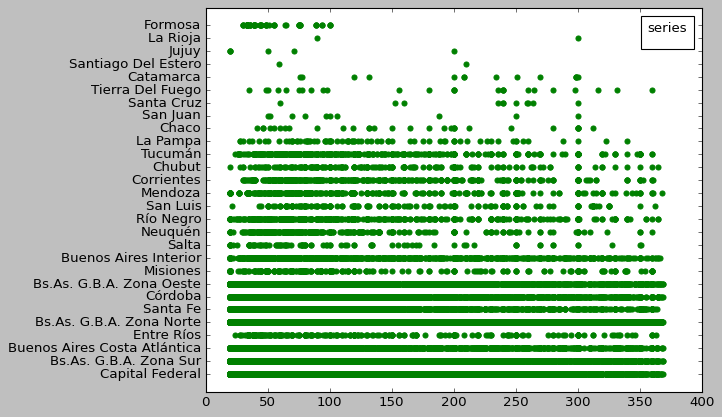

In [98]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(data.surface_total_in_m2_clean, data.state_name, color='green')
ax.legend(loc='upper right', title = 'series')

Vemos como la distribución quedo mucho más linda para trabajar que anteriormente. Y analizamos la distribución de los datos para cada provincia con boxplots.

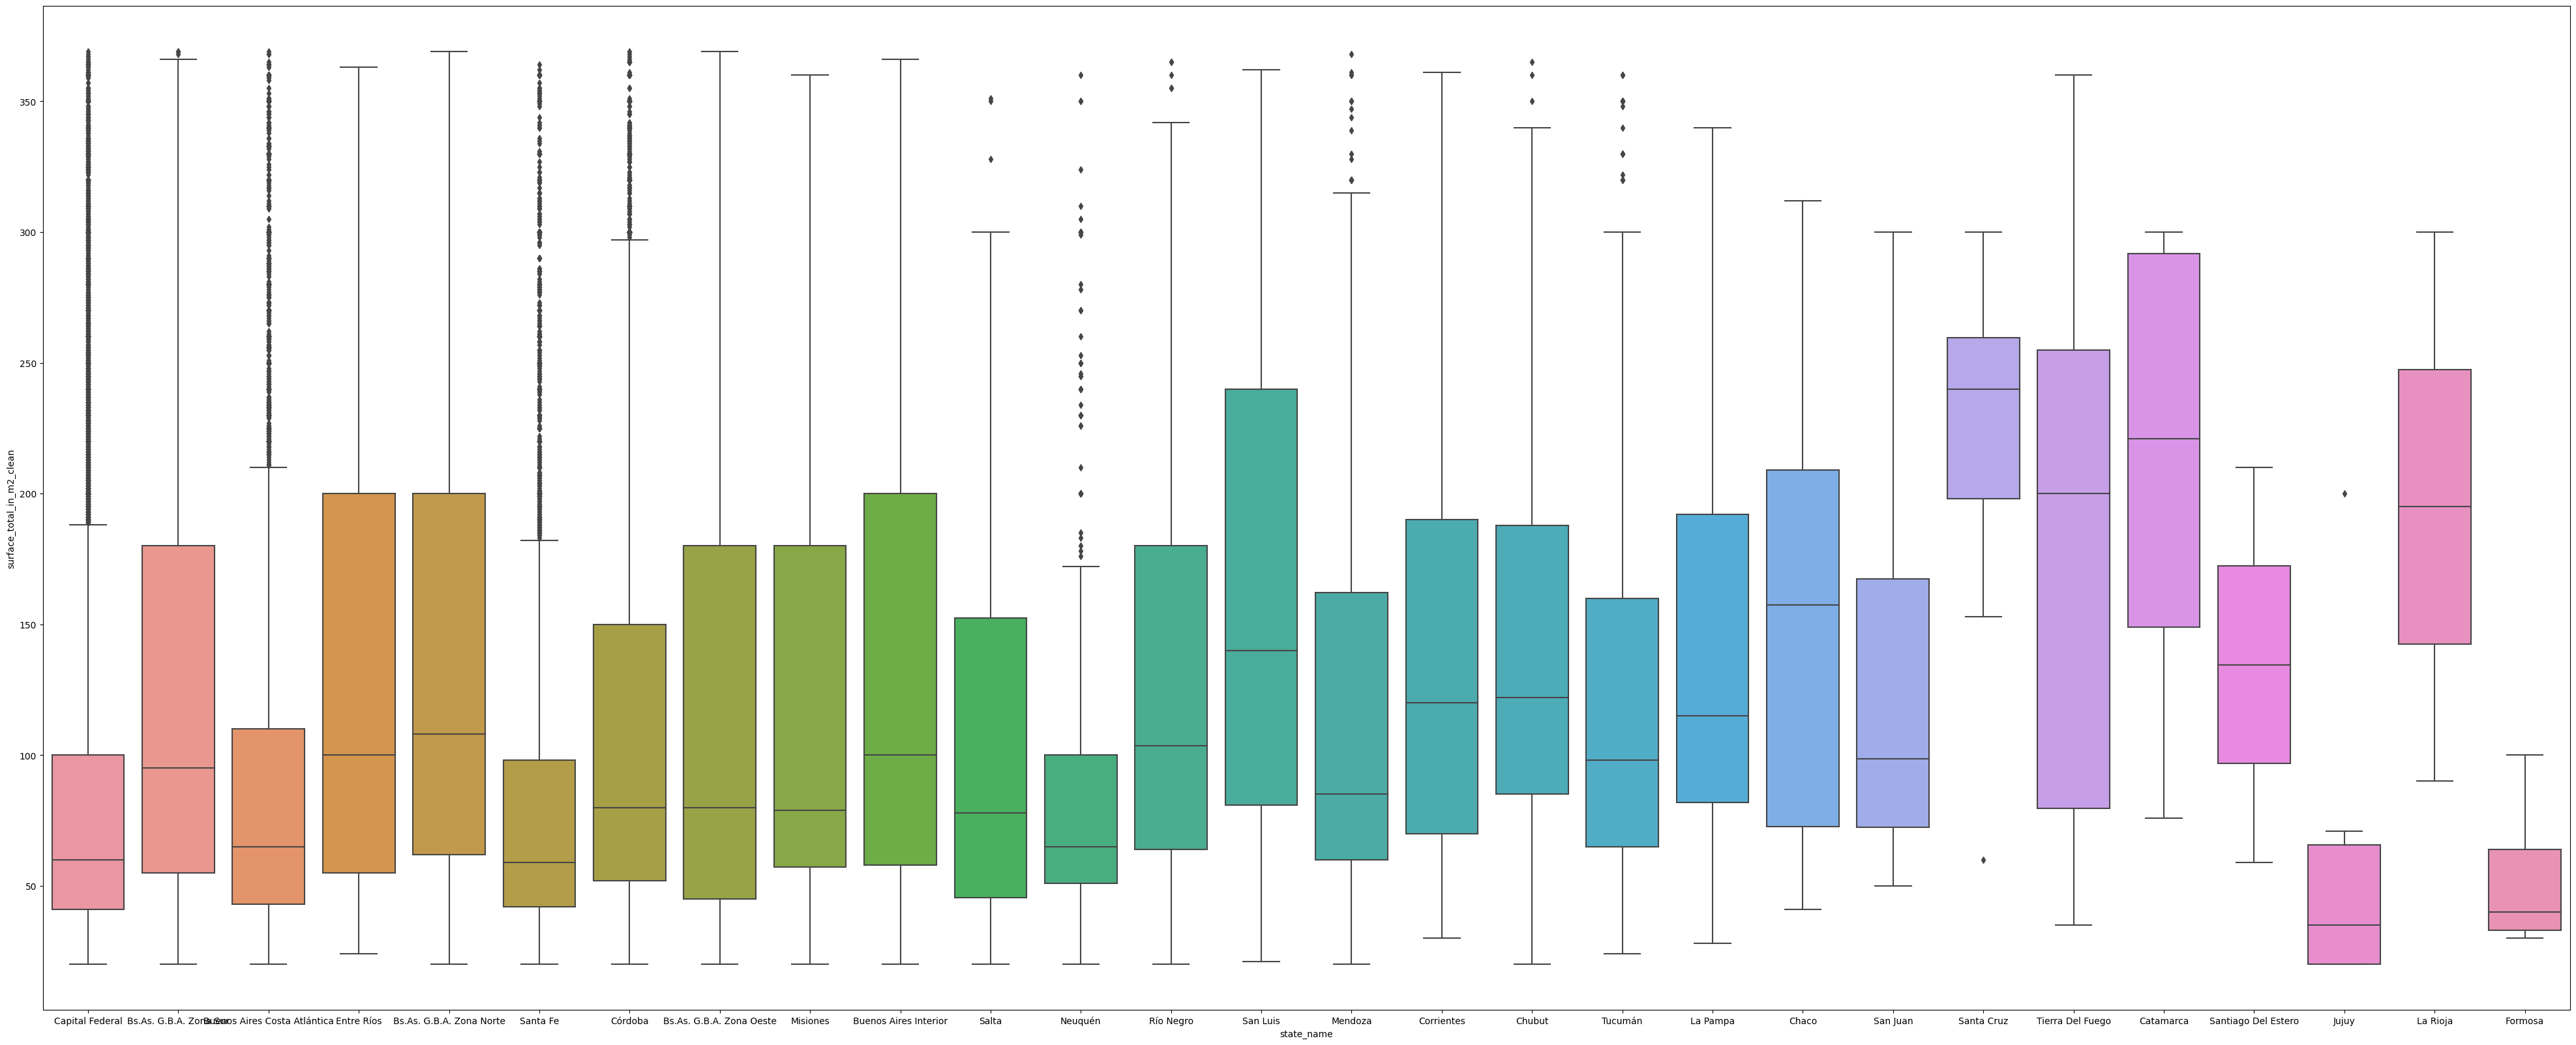

In [99]:
plt.style.use('default')

plt.figure(figsize=(50, 20))
sns.boxplot('state_name', 'surface_total_in_m2_clean', data=data)

El primero es CABA, el segundo Zona Sur, el tercero la Costa, el cuarto entre rios, el quinto zona norte, el sexto Santa Fe. 

Veo que CABA, Costa Atlantica, Santa Fe, y Cordoba tienen una cantidad a considerar de outliers. Elegimos dejarlos porque parecen tener sentido, el resto tienen distribuciones muy esperables. 

In [100]:
data=data.drop(columns=['surface_total_in_m2'])

## *Ambientes y habitaciones*
La estrategia es armar un campo de ambientes que sea la búsqueda de los ambientes en el título y descripción, si no se posee esa información se tomará la información de rooms +1 y se buscará también en el título y descripción la información correspondiente a las habitaciones.
Los outliers se eliminarán.

Vamos a buscar un patrón de ambientes en el título y luego en la descripción

In [101]:
amb_pattern='([0-9]+)\s?amb[a-z]*'
regex = re.compile(amb_pattern, flags = re.IGNORECASE)
result_amb=data.title.apply(lambda x: regex.search(x))
data['ambientes']=result_amb.apply(lambda x: x if x is None else x.group(1))
data['ambientes'].value_counts()

2       7438
3       7063
4       3859
1       1672
5       1166
6        348
7        137
8         43
9         12
10         4
11         4
360        2
14         1
4000       1
15         1
12         1
Name: ambientes, dtype: int64

In [102]:
null_amb=data.loc[data['ambientes'].isnull(),'description']
result_amb_desc=null_amb.apply(lambda x: regex.search(x))
data.loc[data.ambientes.isnull(),'ambientes']=result_amb_desc.apply(lambda x: x if x is None else x.group(1))
data['ambientes']=pd.to_numeric(data.ambientes,downcast ='signed')

Analizamos a los outliers con los ambientes. 


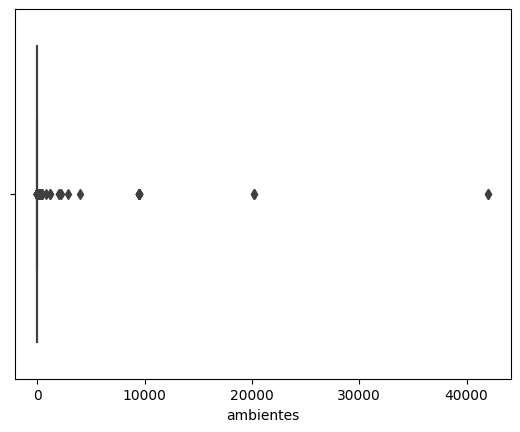

In [103]:
sns.boxplot('ambientes', data=data)

In [104]:
data['ambientes'].value_counts()

2.0        15004
3.0        14470
4.0         8277
1.0         3421
5.0         2468
6.0          737
7.0          305
8.0           66
9.0           27
11.0          13
10.0          13
9502.0         9
50.0           5
14.0           5
23.0           3
12.0           3
360.0          2
36.0           2
90.0           2
33.0           2
24.0           2
0.0            2
1200.0         2
25.0           1
20.0           1
65.0           1
772.0          1
72.0           1
32.0           1
42021.0        1
42028.0        1
2017.0         1
20173.0        1
312.0          1
192.0          1
472.0          1
276.0          1
2227.0         1
28.0           1
103.0          1
415.0          1
20174.0        1
2000.0         1
16.0           1
172.0          1
2861.0         1
53.0           1
4000.0         1
297.0          1
183.0          1
17.0           1
15.0           1
Name: ambientes, dtype: int64

In [105]:
v_outliermax=data['ambientes'].quantile(0.99)
v_outliermax

7.0

In [106]:
data.ambientes.isnull().sum()

76351

Borramos todos aquellos ambientes que posean más de 10 debido al análisis entre el value counts, boxplot y el quantil correspondiente al 0.99 de los datos.

In [107]:
data['ambientes']=data.loc[(data['ambientes']<=10) & (data['ambientes']>0),'ambientes']

In [108]:
data.ambientes.isnull().sum()

76432

Vamos a rellenar los campos que tienen ambientes en nulo con rooms+1.

Primero tomamos el campo que ya vino con el dataset. Luego evaluamos outliers dentro de rooms para luego llenar ambientes.

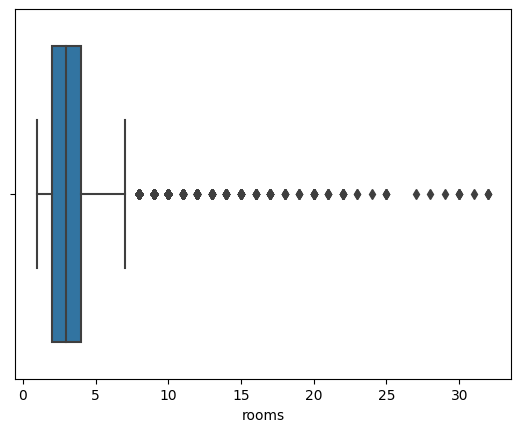

In [109]:
sns.boxplot('rooms', data=data)

Notamos que no hay ningún dato con rooms con 0. 

In [110]:
data.rooms.value_counts()

3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
16.0       11
20.0       11
22.0        8
18.0        6
21.0        5
30.0        4
25.0        4
19.0        4
32.0        3
23.0        2
24.0        1
27.0        1
29.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64

In [111]:
v_outliermax_room=data['rooms'].quantile(0.99)
v_outliermax_room

10.0

In [112]:
data['rooms']=data.loc[data['rooms']<=10,'rooms']

In [113]:
data.loc[data['ambientes'].isnull(),'ambientes']=data.loc[data['ambientes'].isnull(),'rooms']+1

In [114]:
data.ambientes.isnull().sum()

52463

Buscamos en title y en descripción los rooms utilizando regex. 

In [115]:
rooms_pattern='([0-9]+)\s?((hab[a-z]*)|(dor[a-z]*))'
regex_rooms = re.compile(rooms_pattern, flags = re.IGNORECASE)
mask_null_amb=data.ambientes.isnull()
title_rooms_null=data.loc[mask_null_amb,'title']
result_rooms=title_rooms_null.apply(lambda x: regex_rooms.search(x))
data.loc[mask_null_amb, 'amb_rooms_clean']=result_rooms.apply(lambda x: x if x is None else x.group(1))

In [116]:
mask_null_rooms=(data.amb_rooms_clean.isnull()) & (data.ambientes.isnull())
descr_rooms_null=data.loc[mask_null_rooms,'description']
result_rooms=descr_rooms_null.apply(lambda x: regex_rooms.search(x))
data.loc[mask_null_rooms, 'amb_rooms_clean']=result_rooms.apply(lambda x: x if x is None else x.group(1))

In [117]:
data['amb_rooms_clean']=pd.to_numeric(data.amb_rooms_clean,downcast ='signed')
data['amb_rooms_clean']=data['amb_rooms_clean']+1

Procedemos a eliminar los outliers en rooms_clean.

In [118]:
data.amb_rooms_clean.isnull().sum()

100142

In [119]:
v_outliermax_room_clean=data['amb_rooms_clean'].quantile(0.99)
v_outliermax_room_clean

7.0

In [120]:
data['amb_rooms_clean']=data.loc[data['amb_rooms_clean']<=7,'amb_rooms_clean']

In [121]:
data.amb_rooms_clean.isnull().sum()

100334

Unificamos amb_rooms_clean en ambientes.

In [122]:
data.ambientes.isnull().sum()

52463

In [123]:
data.loc[data['ambientes'].isnull(),'ambientes']=data.loc[data['ambientes'].isnull(),'amb_rooms_clean']

In [124]:
data.ambientes.isnull().sum()

31577

In [125]:
data.ambientes.isnull().sum() / data.shape[0]

0.2604933179343343

In [126]:
data=data.drop(columns=['amb_rooms_clean','rooms'])

## *Cochera y Amenities*


Vamos a usar regex para encontrar las propiedades que tienen cochera. 

In [127]:
cochera_pattern = 'cochera'
cochera_regex = re.compile(cochera_pattern, re.IGNORECASE)
cochera_matches = data.description.apply(lambda x: x if x is np.NaN else cochera_regex.search(x))

In [128]:
cochera_matches.notnull().sum()

42442

42.442 registros tienen la palabra 'cochera' en la descripción.

Nos quedamos con los índices de los registros que matchearon con nuestro regex. 

In [129]:
cochera_notnull = cochera_matches.notnull()
indice_cocheras = cochera_matches.loc[cochera_notnull].index

In [130]:
indice_cocheras

Int64Index([     1,     10,     15,     17,     23,     24,     25,     28,
                30,     33,
            ...
            121141, 121144, 121146, 121149, 121157, 121210, 121211, 121214,
            121215, 121217],
           dtype='int64', length=42442)

Agregamos una columna que tiene 1 si el registro tiene cochera, y 0 si no. 

In [131]:
data['cochera'] = np.NaN
data['cochera'].loc[cochera_notnull] = 1
data['cochera'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [132]:
data.cochera = data.cochera.astype(int)
data.cochera.dtype

dtype('int64')

Aún no terminamos con cocheras porque puede ocurrir que el registro especifique no tiene cochera. 
Para no perdernos de esto, armamos un nuevo regez que califique con un 0 a aquellos que calificamos con un 1 erróneamente en el paso previo. 

In [133]:
pattern_s_cochera = 'sin cochera'
s_cochera_regex = re.compile(pattern_s_cochera)
matches_s_cochera = data.description.apply(lambda x: x if x is np.NaN else s_cochera_regex.search(x))
s_cochera_notnull = matches_s_cochera.notnull()
s_cochera_index = matches_s_cochera.loc[s_cochera_notnull].index
s_cochera_index

Int64Index([  3169,   3765,   4063,   5886,   6921,   6931,   7868,   8752,
             10106,  11732,
            ...
            110883, 111152, 113691, 114615, 115521, 115977, 116385, 119087,
            119863, 119999],
           dtype='int64', length=104)

In [134]:
data.cochera.loc[s_cochera_index] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [135]:
data.cochera.loc[s_cochera_index]

3169      0
3765      0
4063      0
5886      0
6921      0
         ..
115977    0
116385    0
119087    0
119863    0
119999    0
Name: cochera, Length: 104, dtype: int64

In [136]:
data.cochera.value_counts()

0    78882
1    42338
Name: cochera, dtype: int64

Tenemos 42.338 registros con cochera y 78.882 sin cochera

Ahora vamos a buscar algunos amenities: gimnasio, sum, piscina y parrilla. Y así como en cochera, creamos una nueva columna para identificar la existencia de cada uno en el registro. 

In [137]:
gimnasio_pattern = 'gimnasio'
gimnasio_regex = re.compile(gimnasio_pattern, re.IGNORECASE)
gimnasio_matches = data.description.apply(lambda x: x if x is np.NaN else gimnasio_regex.search(x))
gimnasio_matches.notnull().sum()

7012

In [138]:
gimnasio_notnull = gimnasio_matches.notnull()
gimnasio_matches.loc[gimnasio_notnull].index

Int64Index([    13,     14,     45,     50,     58,     79,    106,    152,
               156,    219,
            ...
            121049, 121051, 121052, 121093, 121100, 121118, 121120, 121139,
            121148, 121157],
           dtype='int64', length=7012)

In [139]:
data['gimnasio'] = 0
gimnasio_index = gimnasio_matches.loc[gimnasio_notnull].index

In [140]:
data.gimnasio.iloc[gimnasio_index] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [141]:
data.gimnasio.value_counts()

0    114208
1      7012
Name: gimnasio, dtype: int64

In [142]:
gym_pattern = 'gym'
gym_regex = re.compile(gym_pattern, re.IGNORECASE)
gym_matches = data.description.apply(lambda x: x if x is np.NaN else gym_regex.search(x))
gym_matches.notnull().sum()

2385

In [143]:
gym_notnull = gym_matches.notnull()
gym_index = gym_matches.loc[gym_notnull].index
data['gimnasio'].iloc[gym_index] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [144]:
data['gimnasio'].value_counts()

0    111902
1      9318
Name: gimnasio, dtype: int64

In [145]:
sum_pattern = 'sum'
sum_regex = re.compile(sum_pattern, re.IGNORECASE)
sum_matches = data.description.apply(lambda x: x if x is np.NaN else sum_regex.search(x))
sum_matches.notnull().sum()

15081

In [146]:
sum_notnull = sum_matches.notnull()
sum_index = sum_matches.loc[sum_notnull].index
data['sum'] = 0
data['sum'].iloc[sum_index] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [147]:
data['sum'].value_counts()

0    106139
1     15081
Name: sum, dtype: int64

In [148]:
pileta_pattern = 'pileta'
pileta_regex = re.compile(pileta_pattern, re.IGNORECASE)
pileta_matches = data.description.apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_matches.notnull().sum()

19042

In [149]:
pileta_notnull = pileta_matches.notnull()
pileta_index = pileta_matches.loc[pileta_notnull].index
data['pileta'] = 0
data['pileta'].iloc[pileta_index] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [150]:
data['pileta'].value_counts()

0    102178
1     19042
Name: pileta, dtype: int64

In [151]:
piscina_pattern = 'piscina'
piscina_regex = re.compile(piscina_pattern, re.IGNORECASE)
piscina_matches = data.description.apply(lambda x: x if x is np.NaN else piscina_regex.search(x))
piscina_matches.notnull().sum()

15248

In [152]:
piscina_notnull = piscina_matches.notnull()
piscina_index = piscina_matches.loc[piscina_notnull].index
data['pileta'].iloc[piscina_index] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [153]:
data['pileta'].value_counts()

0    88431
1    32789
Name: pileta, dtype: int64

In [154]:
parrilla_pattern = 'parrilla'
parrilla_regex = re.compile(parrilla_pattern, re.IGNORECASE)
parrilla_matches = data.description.apply(lambda x: x if x is np.NaN else parrilla_regex.search(x))
parrilla_matches.notnull().sum()

34037

In [155]:
parrilla_notnull = parrilla_matches.notnull()
parrilla_index = parrilla_matches.loc[parrilla_notnull].index
data['parrilla'] = 0
data['parrilla'].iloc[parrilla_index] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [156]:
data['parrilla'].value_counts()

0    87183
1    34037
Name: parrilla, dtype: int64

Por ultimo, juntamos todas las columnas de nuestro analisis en una sola columna que sume la cantidad de amenities. 

In [157]:
cantidad_amenities = data['pileta'] + data['sum'] + data['parrilla'] + data['gimnasio']
data['cantidad_amenities'] = cantidad_amenities

## *Estado del inmueble (en pozo o en construcción)*

Utilizaremos regex para encontrar los casos que aún se encuentran en pozo. 
Utilizamos "en pozo" ya que observamos que hay casos de falsos positivos al usar solo "pozo" (como por ej: "agua extraída de pozo").

In [158]:
pattern = "en pozo"

regex_pozo = re.compile(pattern, re.IGNORECASE)

pozo_matches = data.description.apply(lambda x: x if x is np.NaN else regex_pozo.search(x))

data_con_pozo = pozo_matches.notnull()

data_indices_pozo = pozo_matches.loc[data_con_pozo].index

In [159]:
data_indices_pozo

Int64Index([   338,    841,   1400,   1402,   1406,   1407,   1419,   2060,
              2690,   2864,
            ...
            118973, 118975, 118976, 118978, 119017, 119027, 119030, 119827,
            119829, 120078],
           dtype='int64', length=1784)

Encontramos 1784 casos en pozo. 

In [160]:
pozo_matches.notnull().sum()

1784

Vamos a crear la columna "estado" para refeleje por defecto 0, y sino 1 si es que el inmueble esta en pozo. 


In [161]:
data["estado"] = 0

data.estado.iloc[data_indices_pozo] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Hacemos lo mismo, pero esta vez considerando aquellos "en construcción" (con y sin tilde).

In [162]:
pattern_construccion = "en construcci(ó|o)n"

regex_construccion= re.compile(pattern_construccion, re.IGNORECASE)

construccion_matches = data.description.apply(lambda x: x if x is np.NaN else regex_construccion.search(x))

data_en_construccion = construccion_matches.notnull()

data_indices_construccion = construccion_matches.loc[data_en_construccion].index



In [163]:
data_indices_construccion

Int64Index([    22,     41,     49,    123,    261,    430,    526,    546,
               656,    702,
            ...
            121197, 121198, 121199, 121200, 121201, 121202, 121203, 121204,
            121205, 121206],
           dtype='int64', length=2771)

Agregamos el valor 2 para aquellos casos en que el ambiente se encuentre en construcción.

In [164]:
data.estado.iloc[data_indices_construccion] = 2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [165]:
data['estado'].value_counts()

0    116738
2      2771
1      1711
Name: estado, dtype: int64

Contabilizamos el total de casos en que el inmueble no fue terminado aún (en pozo o en construcción). 

In [166]:
estado_incompleto = data["estado"] != 0

estado_incompleto.value_counts()

False    116738
True       4482
Name: estado, dtype: int64

In [167]:
porcentaje_incoplmetos = estado_incompleto.sum() / data["estado"].shape *100

porcentaje_incoplmetos

array([3.69740967])

## *Price m2*
Primero realizo un análisis de los datos de precio por m2 que tengo.

In [168]:
data.price_per_m2.isnull().sum()/data.shape[0]

0.27686850354726944

In [169]:
data.price_usd_per_m2.isnull().sum()/data.shape[0]

0.43394654347467415

Veo cómo se distribuyen los precios por m2 con currency en USD para relacionarlos en la misma unidad.

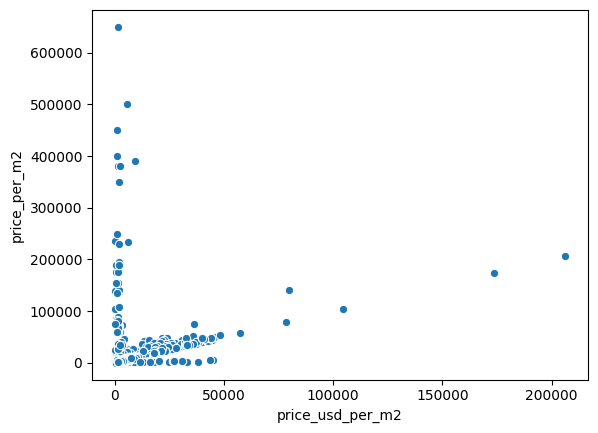

In [170]:
sns.scatterplot('price_usd_per_m2','price_per_m2',data=data[(data['price_usd_per_m2'].notnull()) & (data['currency']=='USD') & (data['price_per_m2'].notnull())])

Analizo los casos que tienen muy alto el price_per_m2 (con currency USD) y medio o bajo el price_usd_per_m2

In [171]:
data.loc[(data['price_usd_per_m2'].notnull()) & (data['price_usd_per_m2']<30000) & (data['price_per_m2']>300000)& (data['currency']=='USD') & (data['price_per_m2'].notnull()),['price','currency','price_aprox_local_currency','price_aprox_usd','price_usd_per_m2','price_per_m2']]

price currency  ...  price_usd_per_m2  price_per_m2
7416    400000.0      USD  ...       1307.189542      400000.0
22590   380000.0      USD  ...       1467.181467      380000.0
54532   350000.0      USD  ...       2046.783626      350000.0
55123   650000.0      USD  ...       1473.922902      650000.0
58729   380000.0      USD  ...       2516.556291      380000.0
73058   500000.0      USD  ...       5555.555556      500000.0
95567   450000.0      USD  ...       1125.000000      450000.0
107483  390000.0      USD  ...       9285.714286      390000.0

[8 rows x 6 columns]

Como conclusión, vemos que hay precios por m2 con currency en dólares con mismo valor que price_aprox_usd es decir no está mostrando el valor por m2. Esto también se visualiza en el scatter plot donde vemos que price_usd_per_m2 va de un rango de 0 a 200000 aproximadamente mientras que price_per_m2 va entre 0 y 700000. Se decide quedarse con la variable de precio por m2 en dólares y trabajar su limpieza de datos.

Se procede a eliminar outliers de price_per_m2 para luego utilizarlo para llenar price_usd_per_m2.

In [172]:
data.loc[data['price_aprox_usd']==data['price_per_m2'],'price_per_m2']=np.NaN

In [173]:
for i in data.state_name.unique():
  mask=(data['currency']=='USD') & (data['state_name']==i)
  quantil_usd=data[mask].price_per_m2.quantile(0.99).round()
  print(i+': '+str(quantil_usd))  
  print('cant total regs: '+str(data[mask].price_per_m2.count()))
  if(data[mask].price_per_m2.count() > 10):
    print('nulos antes: '+str(data[mask].price_per_m2.isnull().sum()))
    data.loc[mask,'price_per_m2']=data.loc[mask & (data['price_per_m2']<=quantil_usd),'price_per_m2']
    print('nulos después: '+str(data[mask].price_per_m2.isnull().sum()))
  else:
    print('No se realizaron cambios por la cantidad de registros')
  print('----------------')

Capital Federal: 22613.0
cant total regs: 26129
nulos antes: 1697
nulos después: 1958
----------------
Bs.As. G.B.A. Zona Sur: 7904.0
cant total regs: 9476
nulos antes: 2242
nulos después: 2337
----------------
Buenos Aires Costa Atlántica: 4299.0
cant total regs: 6608
nulos antes: 2094
nulos después: 2161
----------------
Entre Ríos: 25762.0
cant total regs: 39
nulos antes: 16
nulos después: 17
----------------
Bs.As. G.B.A. Zona Norte: 9597.0
cant total regs: 21404
nulos antes: 1495
nulos después: 1710
----------------
Santa Fe: 41558.0
cant total regs: 1427
nulos antes: 188
nulos después: 203
----------------
Córdoba: 26703.0
cant total regs: 3264
nulos antes: 1076
nulos después: 1109
----------------
Bs.As. G.B.A. Zona Oeste: 23652.0
cant total regs: 6059
nulos antes: 1058
nulos después: 1119
----------------
Misiones: 51000.0
cant total regs: 46
nulos antes: 8
nulos después: 9
----------------
Buenos Aires Interior: 8842.0
cant total regs: 1264
nulos antes: 322
nulos después: 335


Visualizamos a nivel país y por state_name la relación entre price_per_m2 (cuando currency es USD) y price_usd_per_m2

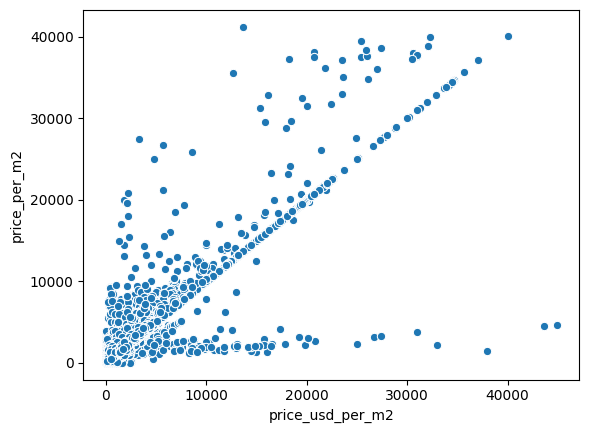

In [174]:
sns.scatterplot('price_usd_per_m2','price_per_m2',data=data[(data['price_usd_per_m2'].notnull()) & (data['currency']=='USD') & (data['price_per_m2'].notnull())])

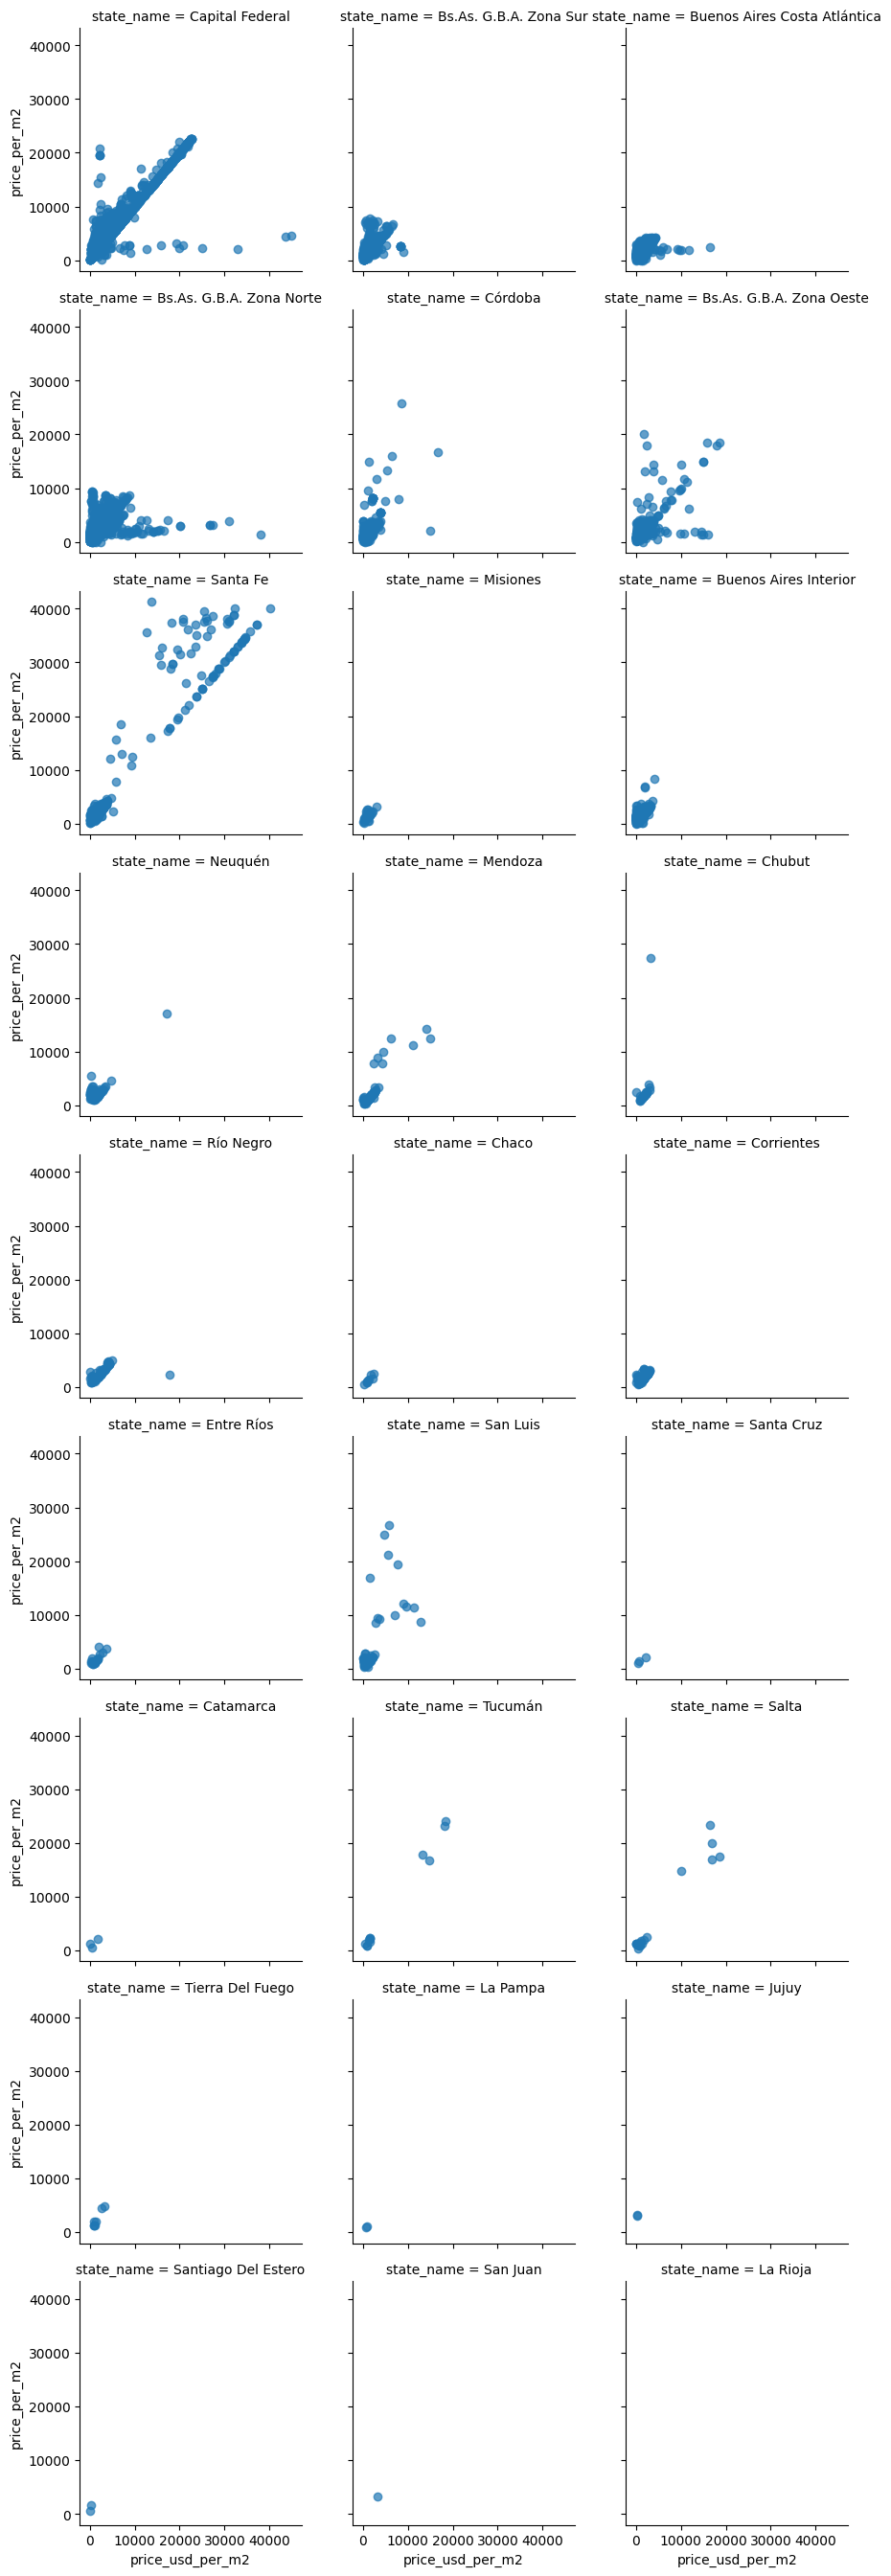

In [175]:
g = sns.FacetGrid(data[data['currency']=='USD'], col_wrap=3, col="state_name")
g.map(plt.scatter, "price_usd_per_m2", "price_per_m2", alpha=.7)
g.add_legend();

Veo cómo se encuentra la variable price_usd_per_m2 antes de llenarla. Miramos sus nulos:

In [176]:
data[data['price_usd_per_m2'].isnull()].groupby('state_name')['price_usd_per_m2'].agg({lambda x: x.isnull().sum()})/data.shape[0]

<lambda>
state_name                            
Bs.As. G.B.A. Zona Norte      0.067274
Bs.As. G.B.A. Zona Oeste      0.038764
Bs.As. G.B.A. Zona Sur        0.064173
Buenos Aires Costa Atlántica  0.030160
Buenos Aires Interior         0.010559
Capital Federal               0.073272
Catamarca                     0.000173
Chaco                         0.000239
Chubut                        0.001105
Corrientes                    0.002211
Córdoba                       0.069254
Entre Ríos                    0.002368
Formosa                       0.000297
Jujuy                         0.000181
La Pampa                      0.001213
La Rioja                      0.000025
Mendoza                       0.003028
Misiones                      0.002236
Neuquén                       0.004067
Río Negro                     0.004892
Salta                         0.001774
San Juan                      0.000313
San Luis                      0.000949
Santa Cruz                    0.000074
Santa Fe                      0.051246
Santiago Del Estero           0.000008
Tierra Del Fuego              0.000025
Tucumán                       0.004067

In [177]:
data.pivot_table('price_usd_per_m2', index='state_name', aggfunc=['mean', 'std', 'min', 'max', 'count']).round(2)

mean  ...            count
                             price_usd_per_m2  ... price_usd_per_m2
Bs.As. G.B.A. Zona Norte              1860.78  ...            17405
Bs.As. G.B.A. Zona Oeste              1349.90  ...             4623
Bs.As. G.B.A. Zona Sur                1525.36  ...             6173
Buenos Aires Costa Atlántica          1574.63  ...             6350
Buenos Aires Interior                  959.95  ...             1011
Capital Federal                       3116.93  ...            23434
Catamarca                              556.05  ...                6
Chaco                                  939.80  ...               28
Chubut                                1708.61  ...              125
Corrientes                            1492.31  ...              315
Córdoba                               1219.63  ...             3674
Entre Ríos                            1255.61  ...               82
Formosa                               1509.65  ...               29
Jujuy                                  617.08  ...                4
La Pampa                               899.38  ...               10
La Rioja                               243.03  ...                1
Mendoza                               1689.74  ...              314
Misiones                               753.05  ...              193
Neuquén                               1788.10  ...              240
Río Negro                             1925.47  ...              215
Salta                                 2547.46  ...               63
San Juan                              1648.24  ...                2
San Luis                              1600.13  ...              137
Santa Cruz                             697.39  ...               11
Santa Fe                              2178.13  ...             3960
Santiago Del Estero                    269.77  ...                3
Tierra Del Fuego                      1168.75  ...               28
Tucumán                               1338.52  ...              181

[28 rows x 5 columns]

En base a los mínimos y máximos veo que habría varios outliers, como ser el caso de Santa Fe, Bs As y Capital Federal.
Procedemos a limpiar los outliers por state name, el caso de Capital Federal lo tomamos aparte para evaluarlo por barrios.

Vamos a limpiar los registros que tengan mas de 50 valores no nulos como para que la distribución sea más fidedigna

In [178]:
for i in data[data.state_name != 'Capital Federal'].state_name.unique():
  print(i)
  mask=data.state_name == i
  umbral_inferior = data[mask].price_usd_per_m2.quantile(0.01).round()
  print('umbral inferior: '+str(umbral_inferior))
  umbral_superior = data[mask].price_usd_per_m2.quantile(0.95).round()
  print('umbral superior: '+str(umbral_superior))
  print('cant total regs: '+str(data[mask].shape[0]))
  print('cant regs nulos: '+str(data[mask].price_usd_per_m2.isnull().sum()))
  if(data[mask].price_usd_per_m2.isnull().sum() > 50):
    data.loc[mask,'price_usd_per_m2']=data.loc[mask & (data['price_usd_per_m2']<=umbral_superior) & (data['price_usd_per_m2']>=umbral_inferior),'price_usd_per_m2']
    print('nulos después: '+str(data[mask].price_usd_per_m2.isnull().sum()))
  else:
    print('No se realizaron cambios por la cantidad de registros')
  print('----------------')

Bs.As. G.B.A. Zona Sur
umbral inferior: 124.0
umbral superior: 2631.0
cant total regs: 13952
cant regs nulos: 7779
nulos después: 8151
----------------
Buenos Aires Costa Atlántica
umbral inferior: 115.0
umbral superior: 2879.0
cant total regs: 10006
cant regs nulos: 3656
nulos después: 4036
----------------
Entre Ríos
umbral inferior: 60.0
umbral superior: 2182.0
cant total regs: 369
cant regs nulos: 287
nulos después: 293
----------------
Bs.As. G.B.A. Zona Norte
umbral inferior: 144.0
umbral superior: 3566.0
cant total regs: 25560
cant regs nulos: 8155
nulos después: 9202
----------------
Santa Fe
umbral inferior: 145.0
umbral superior: 2693.0
cant total regs: 10172
cant regs nulos: 6212
nulos después: 6450
----------------
Córdoba
umbral inferior: 72.0
umbral superior: 2109.0
cant total regs: 12069
cant regs nulos: 8395
nulos después: 8617
----------------
Bs.As. G.B.A. Zona Oeste
umbral inferior: 100.0
umbral superior: 2424.0
cant total regs: 9322
cant regs nulos: 4699
nulos despu

Trabajo los outliers para Capital Federal.

In [179]:
data[data.state_name == 'Capital Federal'].place_name.unique()

array(['Mataderos', 'Liniers', 'Belgrano', 'Palermo Soho', 'Palermo',
       'Flores', 'Boedo', 'Las Cañitas', 'Puerto Madero', 'Balvanera',
       'Caballito', 'Nuñez', 'San Telmo', 'Almagro', 'Capital Federal',
       'Colegiales', 'Floresta', 'Barrio Norte', 'Barracas', 'Recoleta',
       'Congreso', 'Villa Crespo', 'Chacarita', 'Constitución',
       'Villa Urquiza', 'Palermo Hollywood', 'Saavedra', 'Monserrat',
       'Pompeya', 'Parque Chas', 'Paternal', 'Agronomía',
       'Villa Pueyrredón', 'Coghlan', 'Parque Centenario',
       'Palermo Chico', 'Villa Luro', 'Villa Devoto', 'Boca',
       'Parque Avellaneda', 'San Cristobal', 'Velez Sarsfield', 'Abasto',
       'Versalles', 'Villa del Parque', 'Monte Castro', 'Retiro',
       'Parque Patricios', 'San Nicolás', 'Villa Santa Rita',
       'Centro / Microcentro', 'Once', 'Tribunales', 'Parque Chacabuco',
       'Catalinas', 'Villa General Mitre', 'Palermo Viejo',
       'Villa Lugano', 'Villa Ortuzar', 'Villa Soldati', 'Villa Re

In [180]:
data[data.state_name == 'Capital Federal'].place_name.isnull().sum()

0

In [181]:
pd.set_option('display.max_rows',500)

In [182]:
data[data.state_name == 'Capital Federal'].pivot_table('price_usd_per_m2', index='ambientes', aggfunc=['mean', 'std', 'min', 'max', 'count']).round(2)

mean              std  ...              max            count
          price_usd_per_m2 price_usd_per_m2  ... price_usd_per_m2 price_usd_per_m2
ambientes                                    ...                                  
1.0                6041.48          9047.32  ...        206333.33             2043
2.0                3285.47          3889.14  ...        104486.11             5957
3.0                2572.84          1437.32  ...         40720.41             4836
4.0                2642.02          1307.24  ...         25000.00             3544
5.0                2759.02          1957.93  ...         33000.00             1309
6.0                2849.62          2239.99  ...         20731.71              568
7.0                2627.45          1892.53  ...         10658.91              229
8.0                2636.78          1575.92  ...          8791.21               74
9.0                2710.19          1788.89  ...          6836.46               30
10.0               2467.86          1861.31  ...          5989.58               10
11.0               2187.63           725.31  ...          3352.65                6

[11 rows x 5 columns]

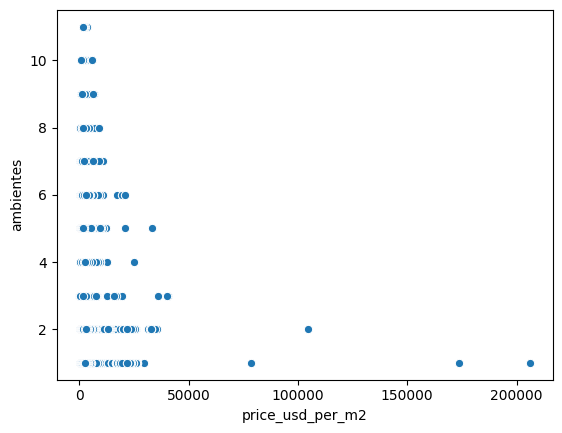

In [183]:
sns.scatterplot('price_usd_per_m2','ambientes',data=data[data.state_name=='Capital Federal'])

Vemos que tengo pocos puntos con valores muy altos para pocos ambientes, los vamos a borrar.

In [184]:
mask_capital=data.state_name=='Capital Federal'
data.loc[mask_capital & (data.price_usd_per_m2 >= 50000), ['place_name','surface_total_in_m2_clean', 'ambientes','price_aprox_usd','price_usd_per_m2','description']]

place_name  ...                                        description
25853      Boedo  ...  bf221- INCREIBLE FORMA DE PAGO- ANT Y CUOTAS D...
26037      Boedo  ...  lan840- DEPTO FINANCIACION DIRECTA EN PESOSAnt...
26193      Boedo  ...  fac030- Depto anticipo en 10 meses y saldo en ...
26637      Boedo  ...  Departamento  1 ambiente divisible Depto en CU...

[4 rows x 6 columns]

In [185]:
data.price_usd_per_m2 = data.loc[(data.price_usd_per_m2 <= 50000), 'price_usd_per_m2']

In [186]:
data[data.state_name == 'Capital Federal'].pivot_table('price_usd_per_m2', index='place_name', aggfunc=['mean', 'std', 'min', 'max', 'count']).round(2)

mean  ...            count
                     price_usd_per_m2  ... price_usd_per_m2
Abasto                        2057.53  ...               85
Agronomía                     2088.12  ...               25
Almagro                       2749.10  ...              830
Balvanera                     1982.25  ...              473
Barracas                      1969.95  ...              355
Barrio Norte                  3098.25  ...              890
Belgrano                      3153.98  ...             2127
Boca                          2068.17  ...              178
Boedo                        10043.76  ...              796
Caballito                     2467.69  ...             1678
Capital Federal               1772.90  ...              831
Catalinas                     1833.33  ...                1
Centro / Microcentro          2555.63  ...              193
Chacarita                     2191.73  ...              178
Coghlan                       2531.45  ...              197
Colegiales                    2514.79  ...              258
Congreso                      2553.59  ...              232
Constitución                  1794.47  ...              161
Flores                        2170.86  ...             1015
Floresta                      1706.74  ...              291
Las Cañitas                   3476.18  ...              128
Liniers                       1803.91  ...              248
Mataderos                     1552.25  ...              287
Monserrat                     2087.70  ...              330
Monte Castro                  1846.99  ...               46
Nuñez                         3246.57  ...              553
Once                          2145.37  ...              120
Palermo                       3388.45  ...             1983
Palermo Chico                 4797.33  ...              182
Palermo Hollywood             3174.22  ...              446
Palermo Soho                  3206.13  ...              300
Palermo Viejo                 3065.84  ...               37
Parque Avellaneda             1384.64  ...               31
Parque Centenario             2267.04  ...               61
Parque Chacabuco              1691.26  ...               89
Parque Chas                   2024.51  ...               15
Parque Patricios              1925.12  ...              233
Paternal                      1912.50  ...              105
Pompeya                       1084.34  ...               31
Puerto Madero                 6029.69  ...              490
Recoleta                      3392.86  ...             1188
Retiro                        3003.91  ...              173
Saavedra                      2538.66  ...              411
San Cristobal                 9952.39  ...              454
San Nicolás                   2342.87  ...              123
San Telmo                     2314.99  ...             1000
Tribunales                    2149.12  ...               73
Velez Sarsfield               1597.58  ...               26
Versalles                     1542.38  ...               26
Villa Crespo                  2522.51  ...             1028
Villa Devoto                  2187.25  ...              262
Villa General Mitre           1800.70  ...               39
Villa Lugano                  1186.14  ...              128
Villa Luro                    2291.95  ...              299
Villa Ortuzar                 2341.30  ...               77
Villa Pueyrredón              2018.19  ...              117
Villa Real                    1467.58  ...               27
Villa Riachuelo               1110.69  ...                3
Villa Santa Rita              1889.19  ...               27
Villa Soldati                  743.67  ...                7
Villa Urquiza                 2495.29  ...             1088
Villa del Parque              2233.84  ...              345

[62 rows x 5 columns]

Procedemos a graficar la distribucíon antes de limpiarla, para luego compararla contra el trabajo que le haremos.

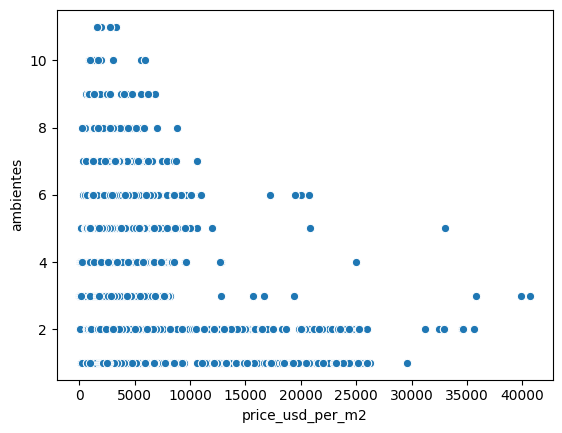

In [187]:
grafico_before_adding = sns.scatterplot('price_usd_per_m2','ambientes',data=data[data.state_name=='Capital Federal'])

Vamos a rellenar los nulos de price_usd_per_m2 que tengan valor en price_per_m2 con currency en USD.

Analizamos los nulos antes de rellenarlos, para luego proceder. 

In [188]:
data.price_usd_per_m2.isnull().sum() / data.shape[0]

0.4565500742451741

In [189]:
price_usd_null=data['price_usd_per_m2'].isnull()
data.loc[price_usd_null,'price_usd_per_m2']=data.loc[price_usd_null & (data['currency']=='USD'),'price_per_m2']

In [190]:
data.price_usd_per_m2.isnull().sum() / data.shape[0]

0.26763735357201784

Vemos cómo varió el campo para Capital Federal.

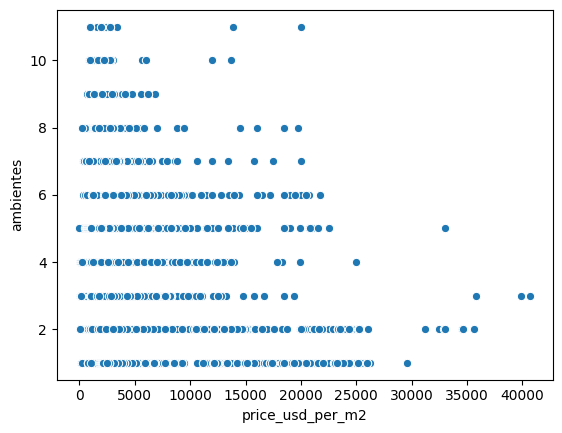

In [191]:
grafico_after_filling = sns.scatterplot('price_usd_per_m2','ambientes',data=data[data.state_name=='Capital Federal'])

Volvemos a limpiar los outliers. Veo que se cargaron valores demasiado altos. 

In [192]:
umbral_inferior = data[mask_capital].price_usd_per_m2.quantile(0.01).round()
print(umbral_inferior)
umbral_superior = data[mask_capital].price_usd_per_m2.quantile(0.95).round()
print(umbral_superior)
data.price_usd_per_m2 = data.loc[(data.price_usd_per_m2 < umbral_superior), 'price_usd_per_m2']
data.price_usd_per_m2 = data.loc[(data.price_usd_per_m2 > umbral_inferior), 'price_usd_per_m2']

627.0
6047.0


Analizamos como quedo la distribución ahora gráficamente:

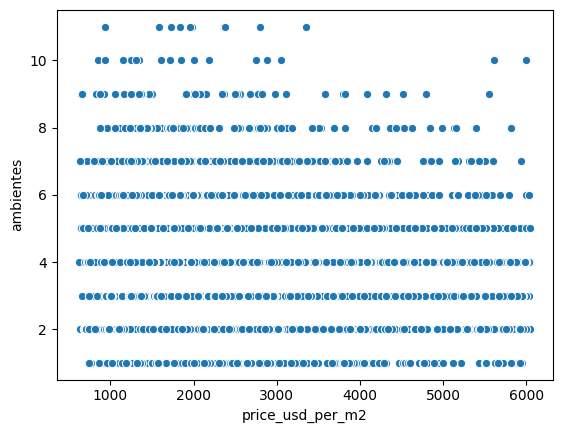

In [193]:
grafico_after_second_cleanse = sns.scatterplot('price_usd_per_m2','ambientes',data=data[data.state_name=='Capital Federal'])

Vemos con cuantos nulos terminamos quedandonos del total del registros.

In [194]:
data.price_usd_per_m2.isnull().sum() / data.shape[0]

0.34263322884012537

In [195]:
data=data.drop(columns=['price_aprox_local_currency','price_aprox_usd','price_per_m2','price','currency'])

## *Limpieza registros*
Como máximo 6 cols en nulo.

In [196]:
cant_filas_original=data.shape[0]
print('Cantidad de filas original: '+str(cant_filas_original))
umbral=18
print('Total cols: '+str(data.shape[1]))
print('Umbral: '+str(umbral))
data=data.dropna(axis=0,thresh=umbral)
cant_filas_final=data.shape[0]
print('Cantidad de filas luego de la limpieza: '+str(cant_filas_final))
print('Me quedé con el '+str(round(cant_filas_final/cant_filas_original * 100))+'% de los datos')

Cantidad de filas original: 121220
Total cols: 24
Umbral: 18
Cantidad de filas luego de la limpieza: 118483
Me quedé con el 98% de los datos


# ***Final de la Limpieza***
---
---


Como conclusión, se realizó trabajo de limpieza en los campos: 

*   Description
*   Price_per_m2 y Price_usd_per_m2 para llenar Price_usd_per_m2
*   Surface_total_in_m2
*   Place_with_parent_names
*   Place_name

Se eliminaron los campos Unnamed: 0, floor, expenses, properati_url, image_thumbnail, lat-lon, price, currency, price_aprox_usd, price_aprox_local_currency.

Se creó el campo ambientes en base a regex y rooms, posteriormente se eliminó el campo de origen rooms.

Se incorporaron además los campos: cochera, gimnasio, sum, pileta, parrilla, cantidad_amenities, estado, place_name_2, suface_total_in_m2_clean (se borró surface_total_in_m2) y comuna.

Finalmente se eliminaron los registros que poseen más de 6 campos nulos.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


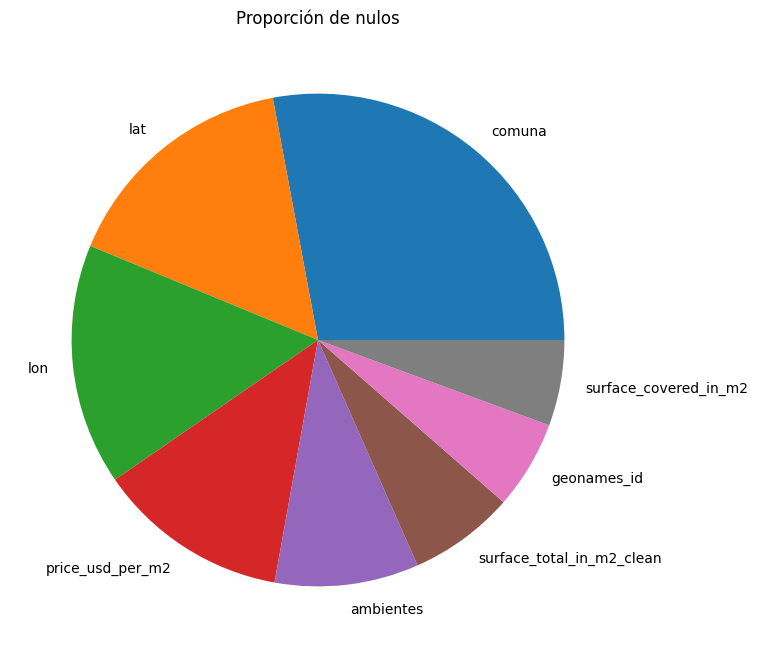

In [197]:
df_null=data.isnull().sum().sort_values(ascending=False)
df_null=df_null.reset_index()
df_null.columns=['field','nulls']

#top 9
df2_null=df_null.iloc[:9]

#others 
new_row = pd.DataFrame(data = {
    'field' : ['others'],
    'nulls' : [df_null['nulls'][9:].sum()]
})

#combining dfs
df_null_final = pd.concat([df2_null, new_row])

df_null_final.plot(kind = 'pie', y = 'nulls', figsize = (8,8), labels = df_null_final['field'],legend =False, title='Proporción de nulos')
pylab.axes().set_ylabel('')
plt.show()


# ***Gráficos***
---
---

Volvemos a analizar la correlación entre variables numéricas.

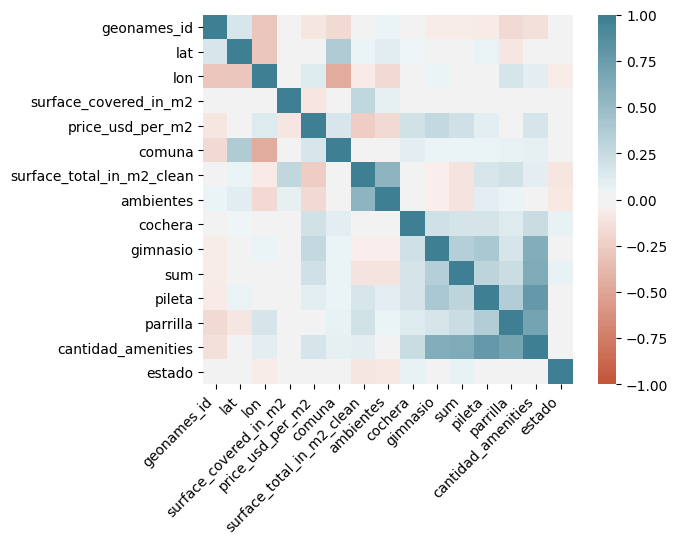

In [198]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Como conclusión vemos que hay correlación entre: 

*   cochera, gimnasio, sum, pileta y parrilla con cantidad_amenities esto se debe a que cantidad_amenities se calcula en base a los otros campos
*  comuna con lat y lon
* lon con geonames_id y lat
* pileta con gimnasio
* price_usd_per_m2 con surface_total_in_m2_clean
* surface_total_in_m2_clean y surface_covered_in_m2





Analizamos nuevamente la relación de precio con distintas caracteristicas de la publicación.

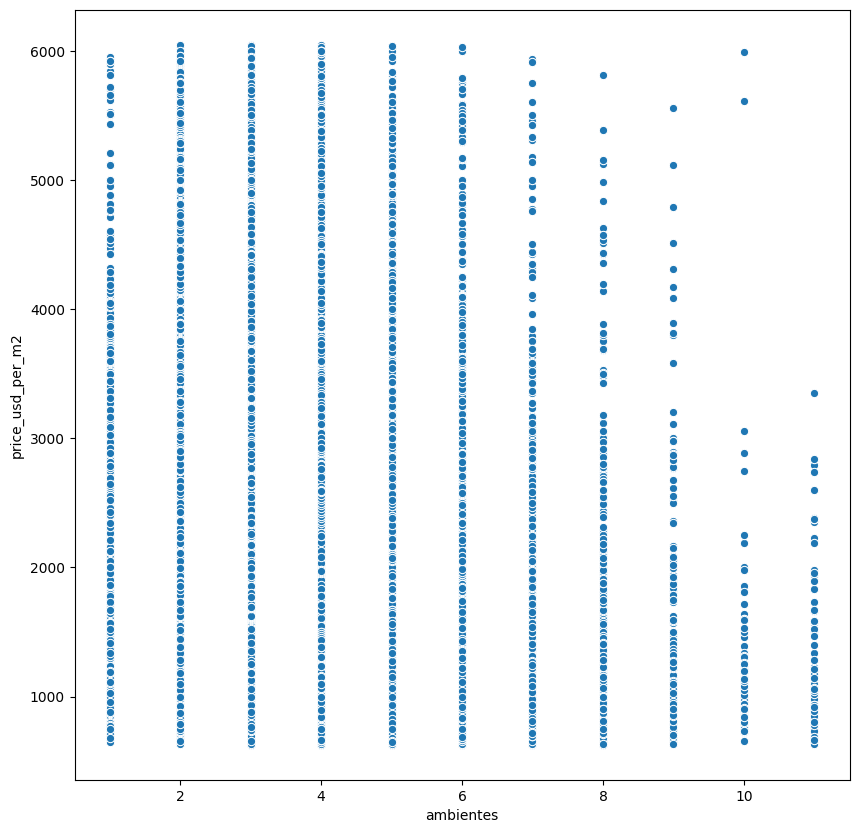

In [199]:
plt.figure(figsize = (10,10))
sns.scatterplot('ambientes', 'price_usd_per_m2', data = data) 

Vemos mayor concentración en la distribución del precio por ambientes en comparación con el análisis de rooms y precio anterior a la limpieza de datos. Seguimos viendo que cuando aumentan los ambientes el valor nominal del m2 disminuye.

Vemos que el precio por m2 a nivel general es menor para lo que es PH y casa en comparación con departamento o store. 

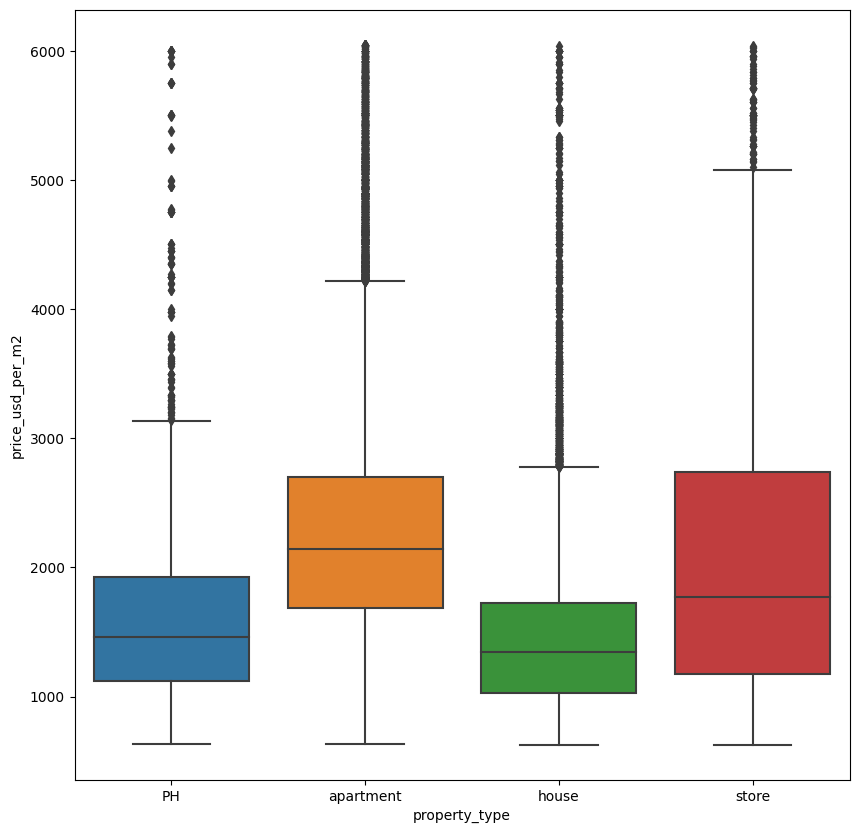

In [200]:
plt.figure(figsize = (10,10))
sns.boxplot('property_type', 'price_usd_per_m2', data = data)

Analizamos también el tipo de propiedad con respecto a la superficie, seguimos viendo que los departamentos y PH son los que concentran menores distribuciones de superficie. Se puede apreciar un gran tratamiento de outliers.

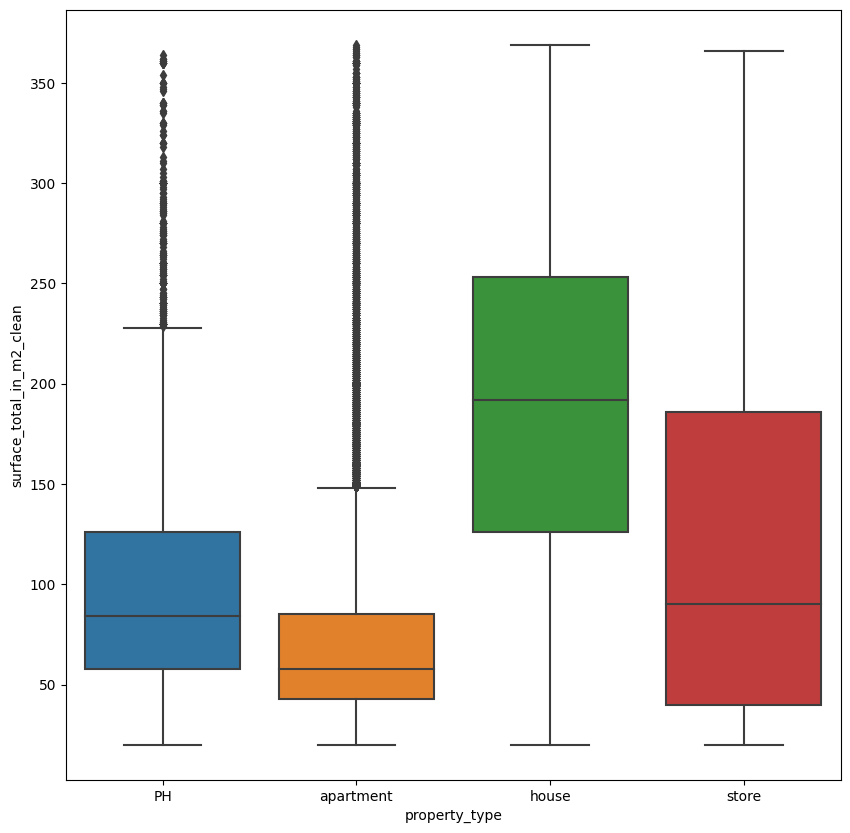

In [201]:
plt.figure(figsize = (10,10))
sns.boxplot('property_type', 'surface_total_in_m2_clean', data = data)

Vemos cómo se relacionan la cantidad de ambientes con respecto a la superficie, el máximo de habitaciones es 12 por lo que se realizó un tratamiento de outliers. 

<Figure size 1000x1000 with 0 Axes>

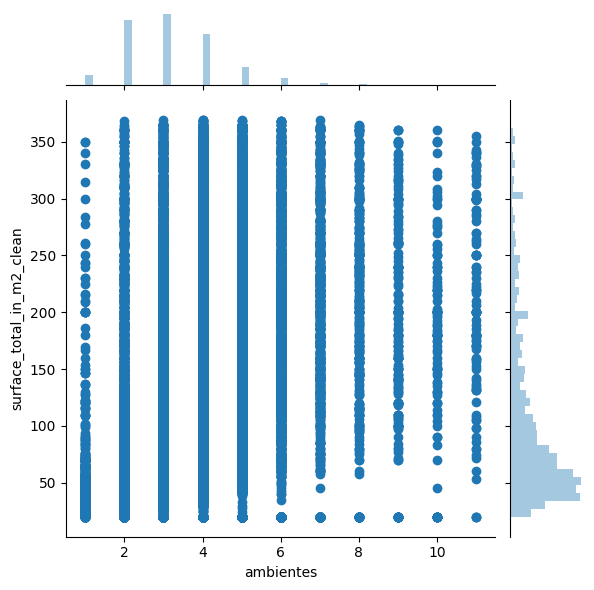

In [202]:
plt.figure(figsize = (10,10))
sns.jointplot('ambientes', 'surface_total_in_m2_clean', data = data)

Reevaluamos si existe correlación entre el precio y la superficie total en metros cuadrados. 


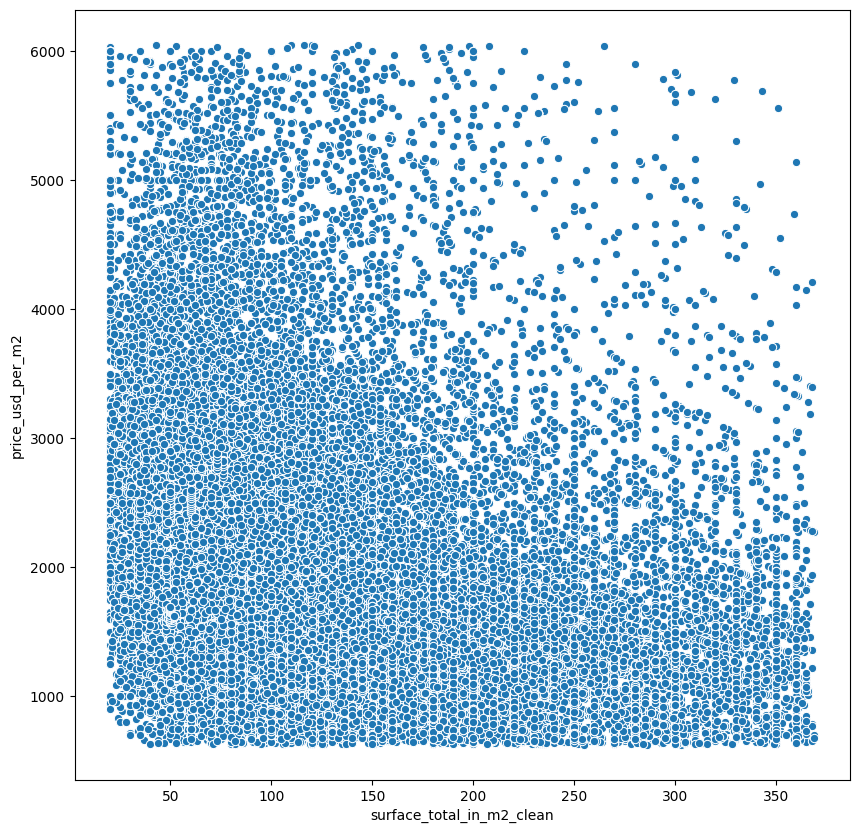

In [203]:
plt.figure(figsize = (10,10))
sns.scatterplot('surface_total_in_m2_clean', 'price_usd_per_m2', data = data)

Se percibe gran tratamiento de outliers. Evaluamos este caso puntualmente para la zona de Bs As y CABA para ver si existe correlación.

In [204]:
list_state_name=['Capital Federal','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Oeste','Buenos Aires Interior']
data_bsas_caba=data[data.state_name.isin(list_state_name)]

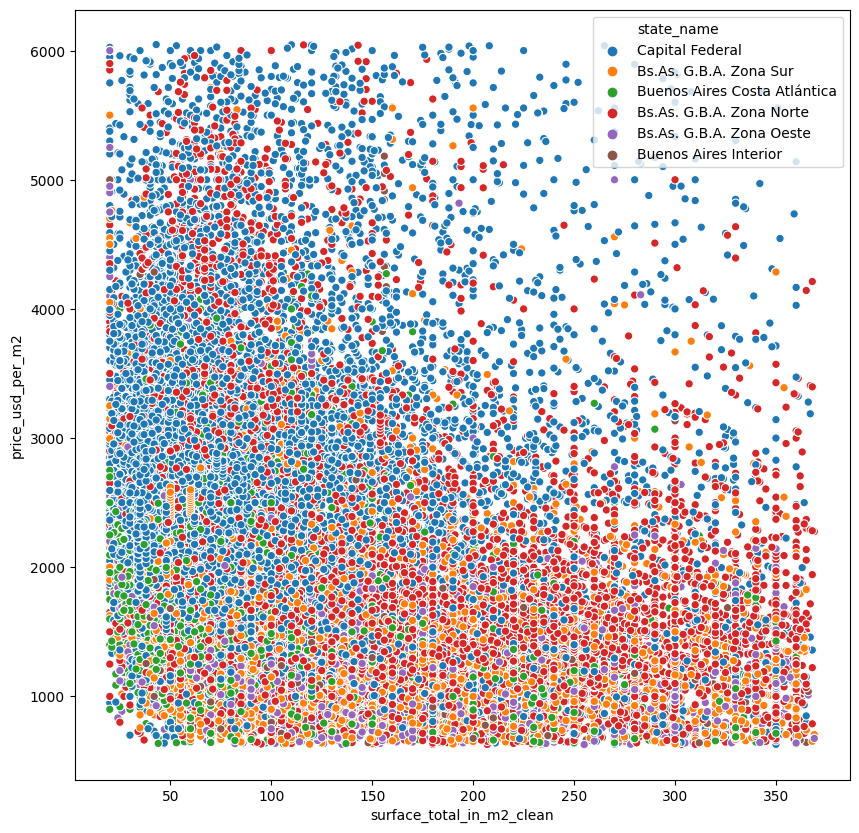

In [205]:
plt.figure(figsize = (10,10))
sns.scatterplot('surface_total_in_m2_clean', 'price_usd_per_m2', data = data_bsas_caba,hue='state_name')

Se ve que el precio por metro cuadrado es más alto para Capital Federal y Zona Norte mientras que para Zona Sur y Costa Atlántica se manejan precios más bajos.

Hacemos el análisis por comuna para CABA:

In [206]:
sns.catplot('surface_total_in_m2_clean','price_usd_per_m2',data=data[data.state_name=='Capital Federal'], col='comuna', col_wrap=2, height=15)

Output hidden; open in https://colab.research.google.com to view.

Vemos en qué comunas hay más publicaciones y de qué tipo de propiedad.

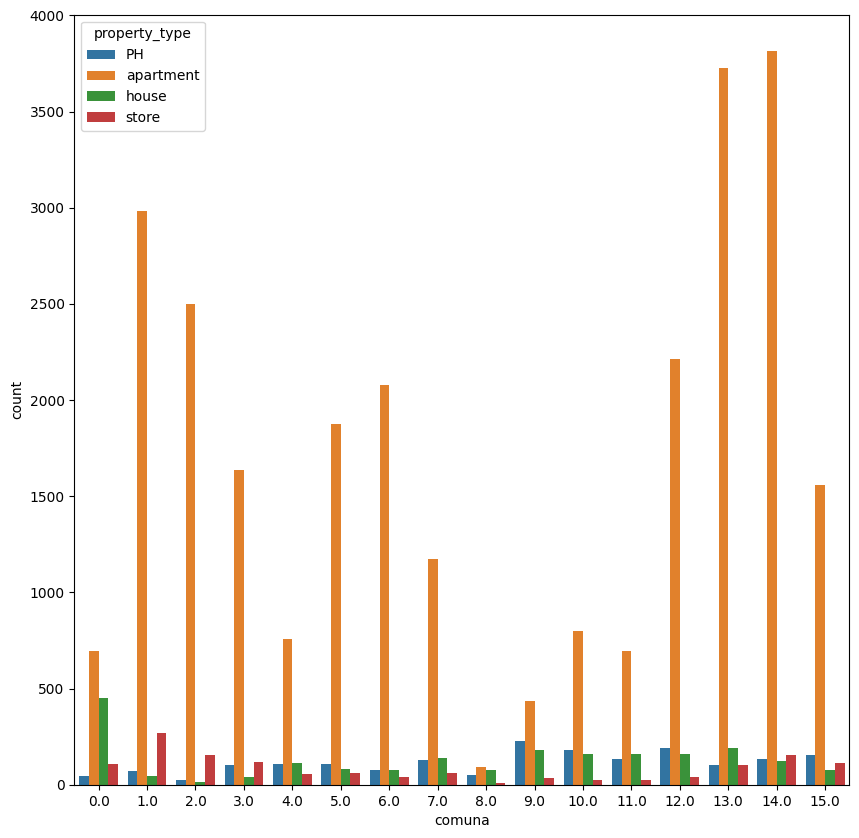

In [207]:
plt.figure(figsize = (10,10))
sns.countplot('comuna', data=data[data.state_name=='Capital Federal'], hue='property_type')

Vemos que predominan las publicaciones de departamentos.

Analizamos el área de Buenos Aires y Capital Federal en conjunto.

Vemos qué tipo de propiedad posee cada zona.

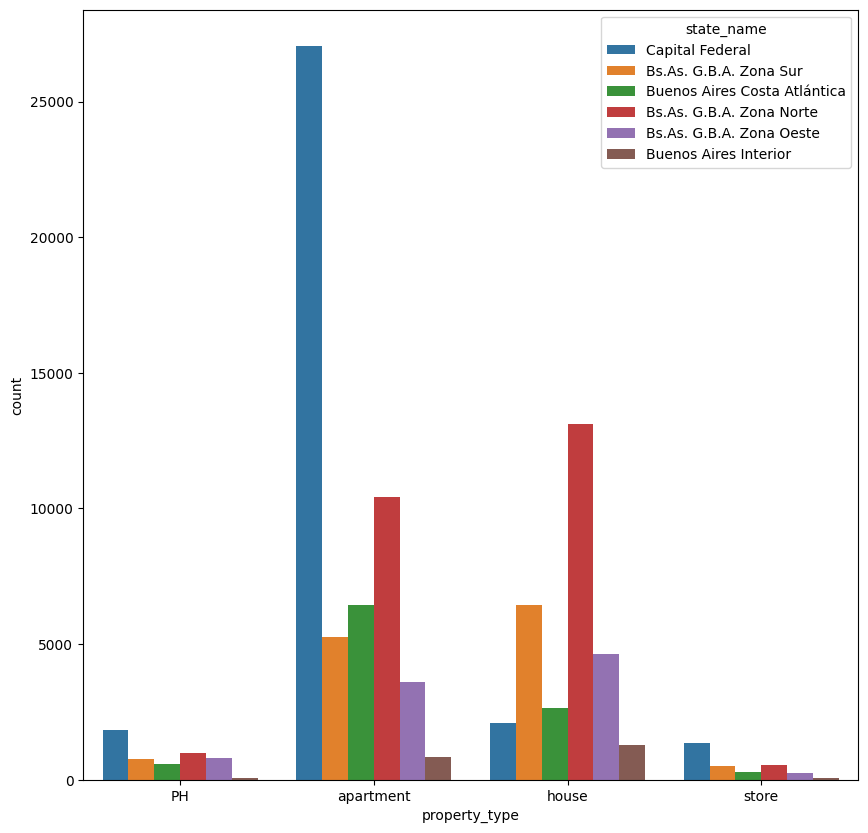

In [208]:
plt.figure(figsize = (10,10))
sns.countplot('property_type', data=data_bsas_caba, hue='state_name')

Vemos que se sigue manteniendo la conclusión de que hay más casos de departamento para lo que es Capital Federal mientras que para Bs As Costa Atlántica hay más departamentos pero considerablemente menor cantidad que CABA y para Bs As Zona Oeste, Sur y Norte hay más casos de casas.


Queremos ver cómo se distribuyen los precios para estas zonas:

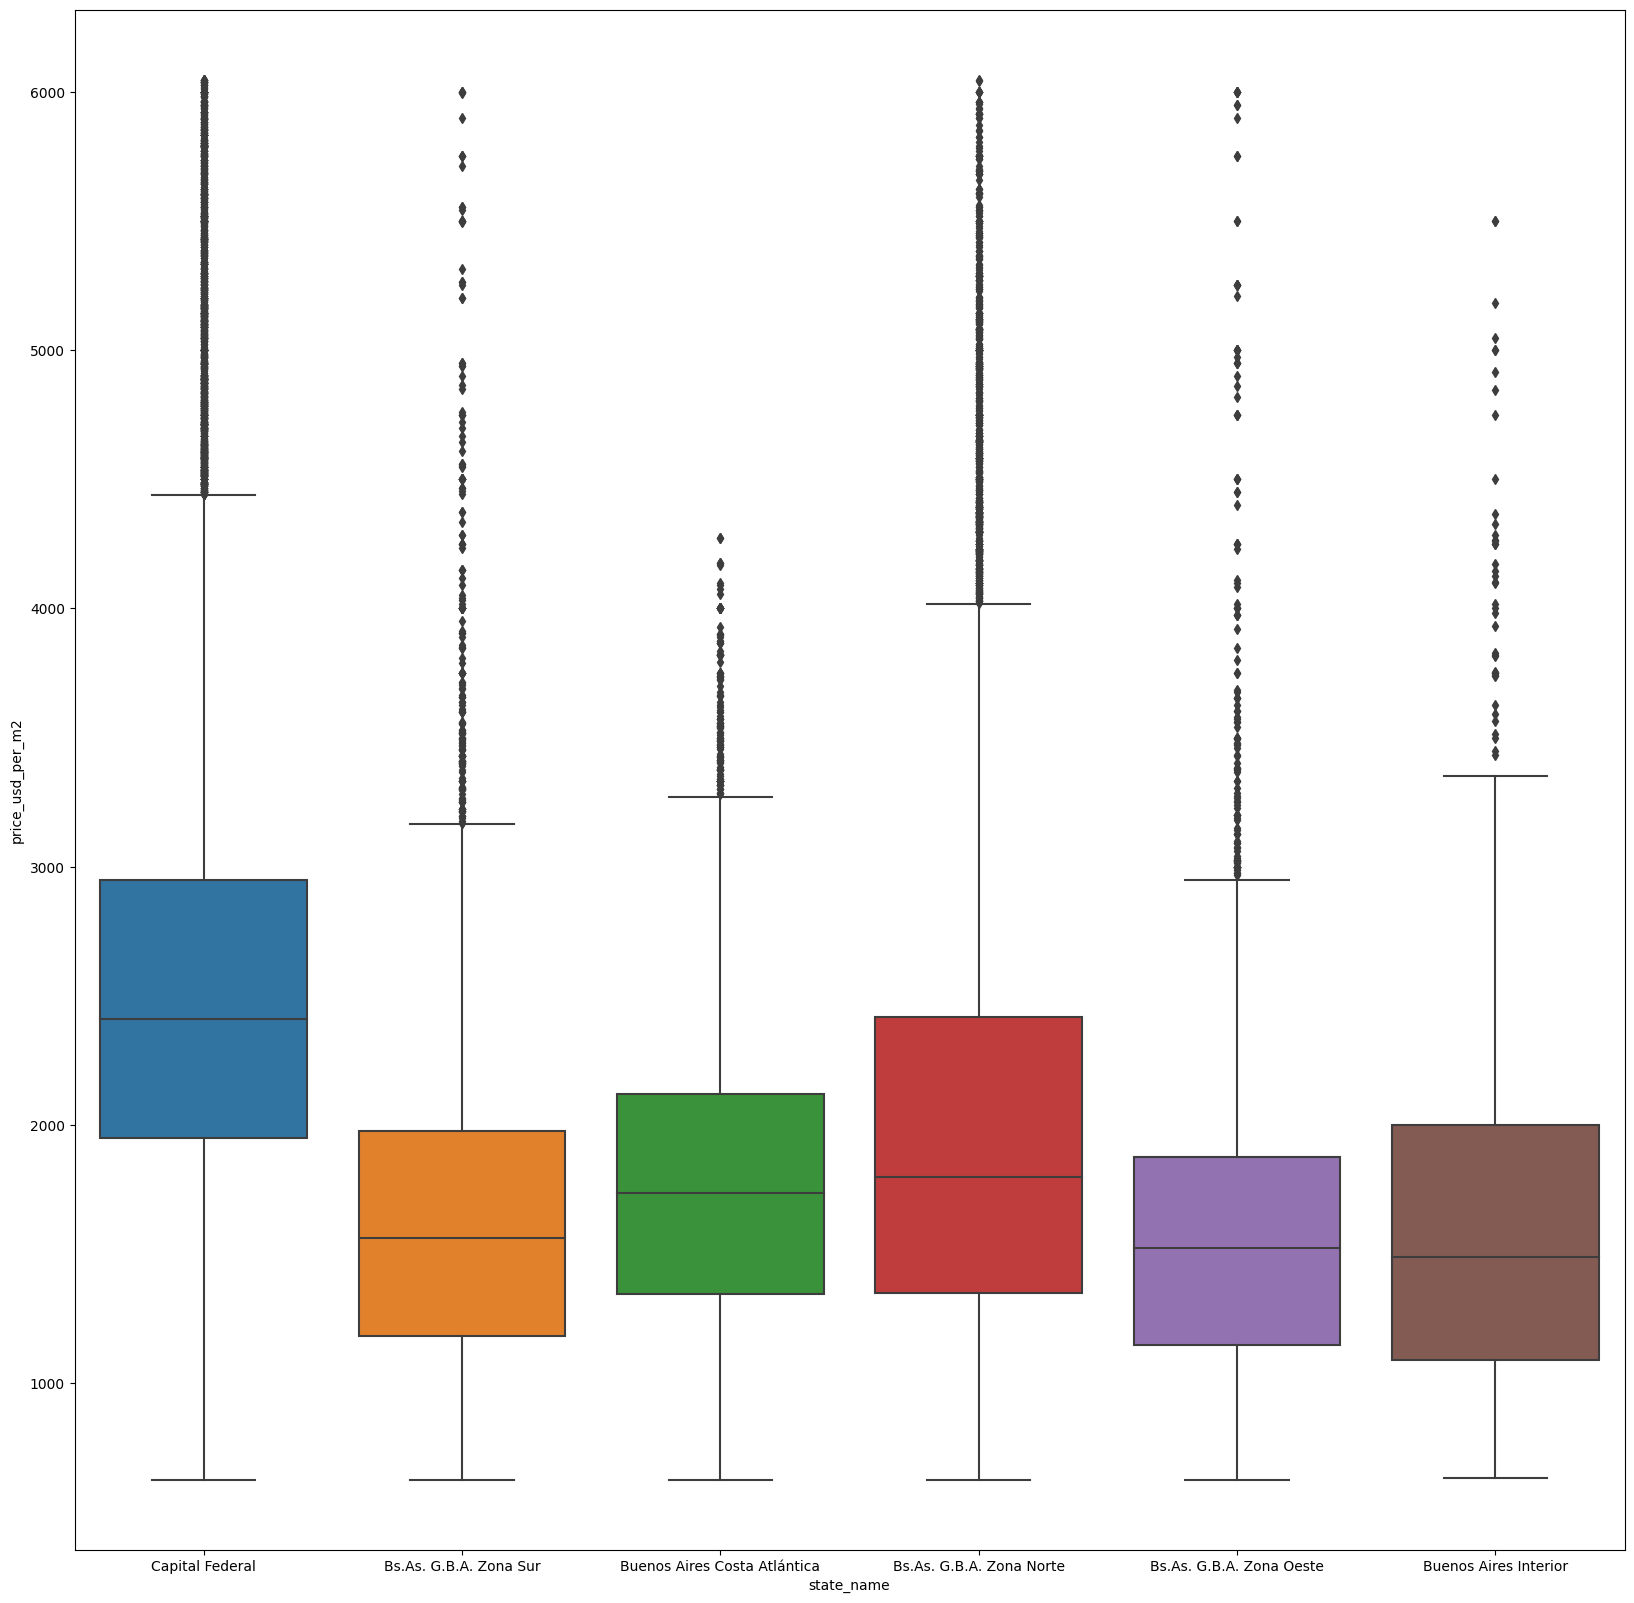

In [209]:
plt.figure(figsize = (20,20))
sns.boxplot('state_name', 'price_usd_per_m2', data = data_bsas_caba)

Además vamos a analizar si hay alguna relación entre el estado y el precio. Capital Federal maneja precios más altos.

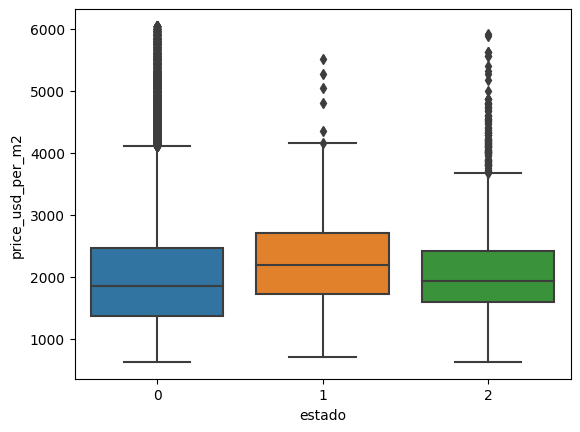

In [210]:
sns.boxplot('estado','price_usd_per_m2',data=data)

No vemos gran alteración en la concentración del percio por m2 en dólaes entre una propiedad en pozo/construcción a una sin.

Además vamos a ver si varía el precio en cuanto a la cantidad de amenities.

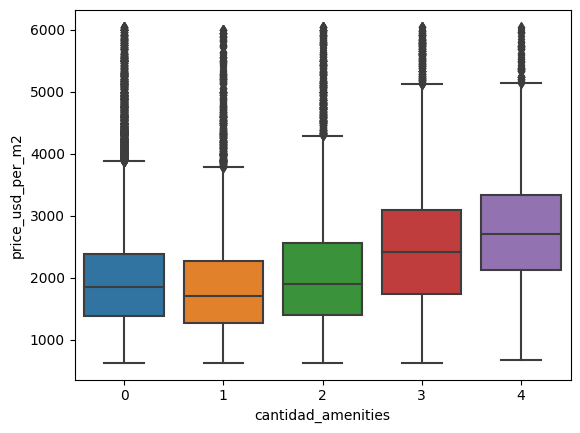

In [211]:
sns.boxplot('cantidad_amenities','price_usd_per_m2',data=data)

Vemos que el precio por m2 aumenta cuantos más amenities posee.




Vamos a ver qué barrios de CABA poseen más cantidad de amenities en promedio.

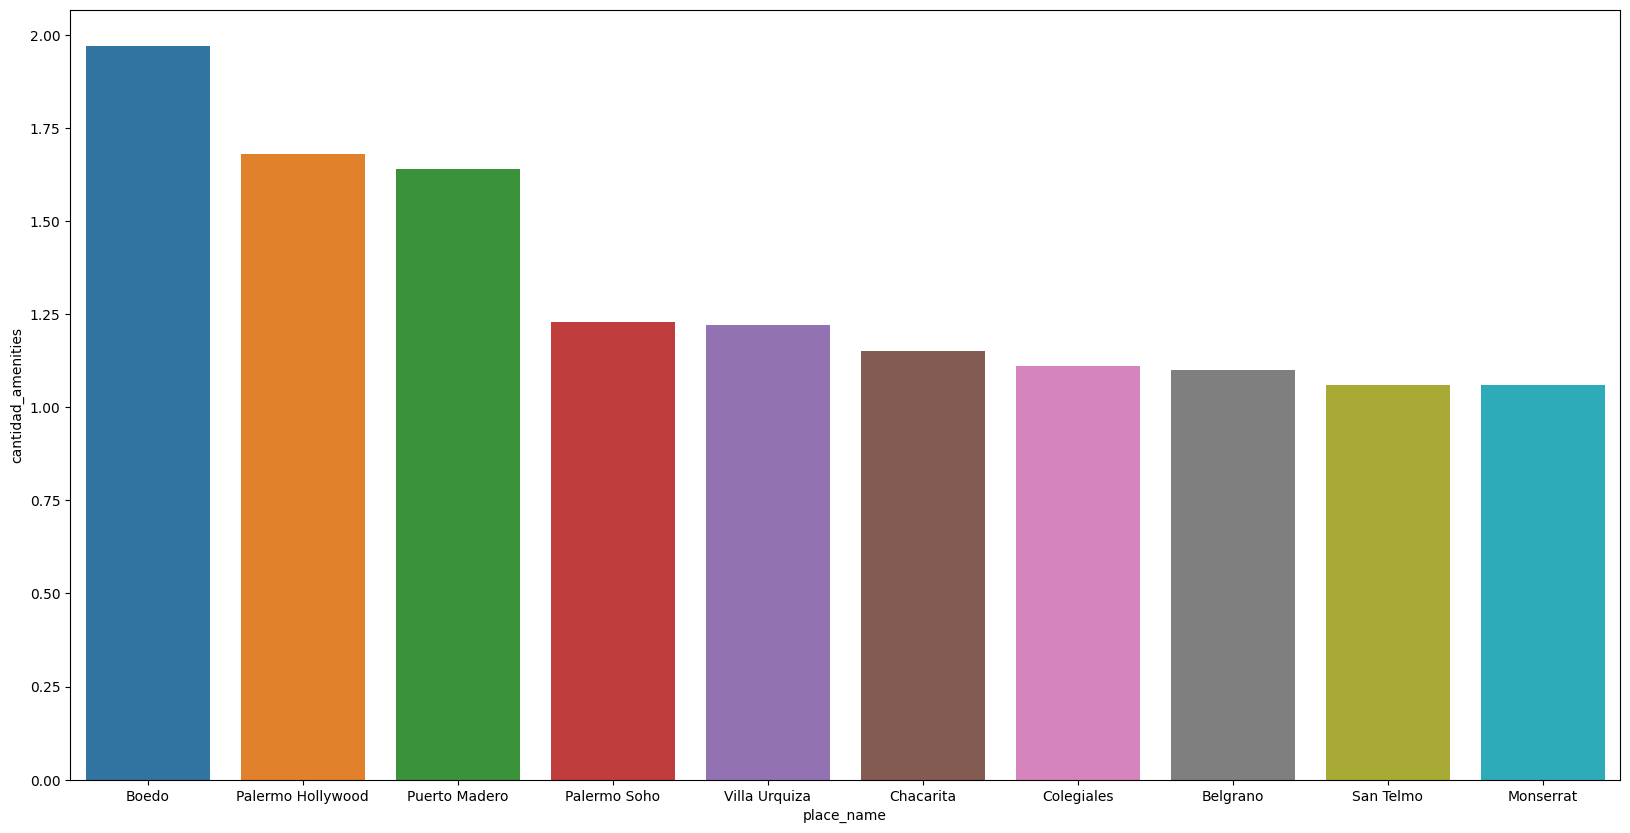

In [212]:
data_amenities_caba=pd.pivot_table(data[data.state_name=='Capital Federal'], 'cantidad_amenities','place_name', aggfunc='mean').round(2).sort_values(by='cantidad_amenities',ascending=False).head(10)
data_amenities_caba=data_amenities_caba.reset_index()
plt.figure(figsize = (20,10))
sns.barplot('place_name','cantidad_amenities',data=data_amenities_caba)


Vemos que los barrios que más amenities poseen son Boedo, Palermo Hollywood y Puerto Madero.

Analizamos en base a un histograma la diferencia en los precios para Capital Federal en cuanto a si tienen o no amenities.

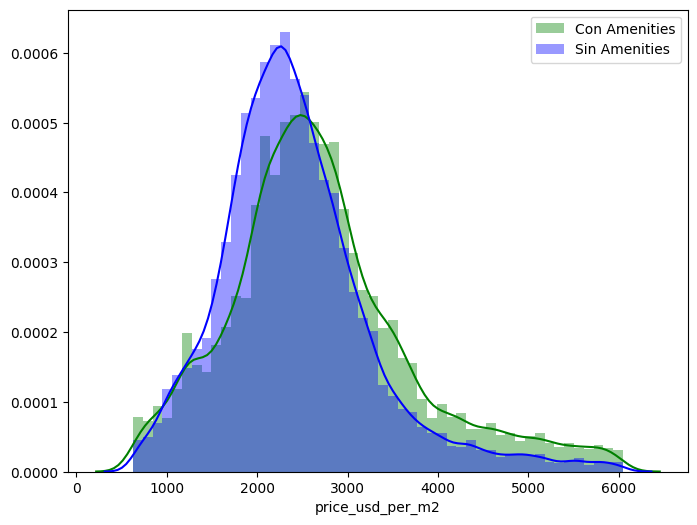

In [217]:
data_amenities=data.loc[data.state_name=='Capital Federal',['price_usd_per_m2','cantidad_amenities']]
data_amenities.loc[data_amenities['cantidad_amenities'] > 0, 'Amenities'] = 'Con Amenities' 
data_amenities.loc[data_amenities['cantidad_amenities'] == 0, 'Amenities'] = 'Sin Amenities' 
plt.figure(figsize=(8,6))
ax1 = sns.distplot(data_amenities.loc[data_amenities['Amenities']=='Con Amenities','price_usd_per_m2'], label='Con Amenities', color="green")
ax2 = sns.distplot(data_amenities.loc[data_amenities['Amenities']=='Sin Amenities','price_usd_per_m2'], label='Sin Amenities', color="blue")
plt.legend()
plt.show()

Vemos en color verde la distribución del precio para las propiedades con amenities y vemos que manejan concentraciones de precios más altos en comparación con aquellas propiedades sin amenities.

# ***Cierre y Conclusiones***
---
---

## *Deseables*
Como deseables nos quedaron los siguientes items:
* Utilización de geopandas para clasificar y visualizar mejor los registros geográficamente. Completar registros faltantes de localización con esta librería.
* Analizar más a fondo ciertas relaciones como el impacto de cada tipo de amenity en el precio por m2, ver si una cochera agrega más valor que una parrilla.
* Analizar la superficie por m2 para los barrios de CABA.
* Dividir el price por la superficie en m2 para encontrar más valores de price per m2.
* Herramientas de visualización más avanzadas e interactivas como bokeh y plotly.

Con respecto a regex nos hubiese gustado buscar: 
* Buscar comuna a los de comuna 0 (comuna default correspondiente a 'Otros')
* Precio por m2
* Superficie por m2
* Piso de los departamentos

Con respecto al precio y a las expensas, las buscamos con regex en la descripción pero no aportaban un gran porcentaje de valores a completar por lo que decidimos no proseguir con las estrategias por una cuestión de tiempo.

Con respecto a los datos, nos hubiese gustado tener:
* Fecha de publicación, buscar la cotización del día para entender la conversión con respecto a la moneda.
* Antigüedad de la propiedad, ver si es a estrenar o nuevo, o si es una casa vieja. 
* Amueblado o no.




## *Conclusiones*
Fue un dataset desafiante, con varios trabajos para seguir haciendo pero el cual pudimos limpiar mucho y siempre le encontramos algo para mejorar. El trabajo con regex puede hacerse casi sin fin, decidimos ponernos un stop según los tiempos que fuimos manejando.

Decidimos no rellenar valores con estimadores por el momento, pero es una posibilidad de ser necesario para la realización de un modelo (por ejemplo rellenar con valores cercanos a la media con cierta desviación, o con la media de una porción de la muestra tomada especialmente, etc).

Un modelo de estimación de precio se basaría principalmente en precio por m2, superficie en m2, zona geográfica, cantidad de amenities. También podemos pensar en property type, estado (pozo, en construcción), entre otros campos. 

